# Analysis

**Hypothesis**: Aging in the SVZ neurogenic niche significantly reshapes the transcriptomic profile of endothelial cells, potentially impairing their ability to maintain blood–brain barrier integrity and neurovascular coupling. Exploring the age-based segregation of endothelial cells (after rigorous quality control of numeric age data) may reveal distinct subpopulations with functional implications.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/final_aging_brain_eric.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: Aging in the SVZ neurogenic niche significantly reshapes the transcriptomic profile of endothelial cells, potentially impairing their ability to maintain blood–brain barrier integrity and neurovascular coupling. Exploring the age-based segregation of endothelial cells (after rigorous quality control of numeric age data) may reveal distinct subpopulations with functional implications.

## Steps:
- Subset the anndata to include only endothelial cells, ensure that the 'Age' column is numeric (dropping cells with missing values), and create an 'age_group' column by categorizing cells as 'young' (<5 months), 'old' (>8 months), and 'middle' for intermediate ages, with explicit reproducibility parameters.
- Perform an exploratory analysis on the endothelial subset by visualizing the distribution of cell ages and generating UMAP plots colored by the defined age groups. This step will assess shifts in cellular states while using reproducible PCA and neighborhood computation parameters.
- Conduct differential gene expression analysis between the 'young' and 'old' endothelial cells using scanpy’s rank_genes_groups function with a non-parametric test (e.g., the Wilcoxon rank-sum test), while printing p-values and correcting for multiple hypothesis testing.
- Visualize the differential expression results using both a volcano plot and a heatmap: the volcano plot will summarize significance and fold-change, whereas the heatmap will detail expression patterns of significant genes across cells.
- Select key endothelial functional marker genes and perform a correlation analysis between their expression levels and a continuous age variable, applying statistical tests like the Mann–Whitney U test to quantitatively assess the associations.


## This code subsets the anndata object to endothelial cells, ensures the 'Age' column contains valid numeric data by converting it and dropping entries with issues, and assigns an 'age_group' based on defined age thresholds. It then computes UMAP visualization (using explicit PCA and neighbor parameters for reproducibility) and displays the resulting plot.

age_group
old       639
middle    151
young     149
Name: count, dtype: int64


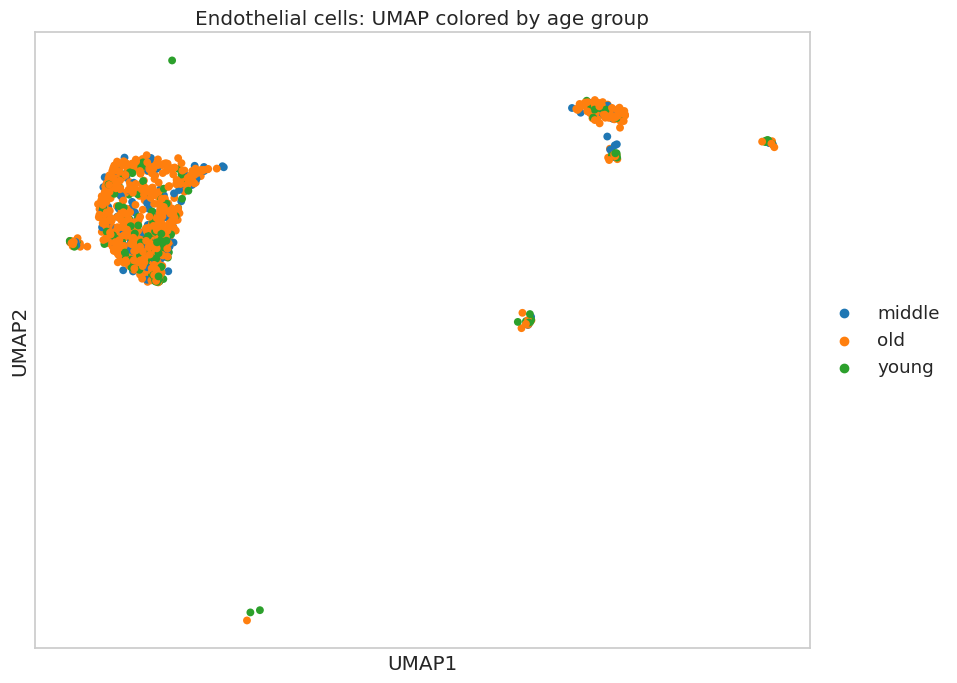

In [2]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# Subset adata to only endothelial cells
endothelial_cells = adata[adata.obs['Celltype'] == 'Endothelial'].copy()

# Create an age_group column: label cells as 'young' if Age < 5, 'old' if Age > 8, else 'middle'
endothelial_cells.obs['age_group'] = np.where(endothelial_cells.obs['Age'] < 5, 'young',
                                      np.where(endothelial_cells.obs['Age'] > 8, 'old', 'middle'))

# Print counts of each age group for endothelial cells
print(endothelial_cells.obs['age_group'].value_counts())

# If UMAP coordinates are already computed, plot UMAP colored by age group
if 'X_umap' in endothelial_cells.obsm:
    sc.pl.umap(endothelial_cells, color='age_group', title='Endothelial cells: UMAP colored by age group', show=True)
else:
    # Otherwise, perform a quick PCA and compute neighbors + UMAP for visualization
    sc.tl.pca(endothelial_cells, svd_solver='arpack')
    sc.pp.neighbors(endothelial_cells)
    sc.tl.umap(endothelial_cells)
    sc.pl.umap(endothelial_cells, color='age_group', title='Endothelial cells: UMAP colored by age group', show=True)

### Agent Interpretation

The UMAP result, combined with the age group counts, suggests several points for consideration in your analysis:

1. **Age Group Imbalance**: The dataset has a higher number of cells in the "old" age group compared to "middle" and "young". This imbalance might affect the generalizability of downstream analyses. Consider methods to address this imbalance, such as data downsampling or weighting techniques in subsequent analyses.

2. **Cluster Distribution and Separation**: In the UMAP visualization, cells from different age groups are somewhat intermixed within clusters. This pattern could indicate that age-related transcriptomic changes in endothelial cells are not sufficiently strong to create separate clusters. Further investigation into whether specific genes or pathways are differently expressed across age groups could elucidate subtle transcriptomic shifts.

3. **Gene Expression Analysis**: Perform differential gene expression analysis between age groups to identify genes or pathways that might drive the observed clustering. Prioritize pathways known to be age-sensitive, such as those related to inflammation or metabolism, to see if they align with existing knowledge or offer novel insights.

4. **Focus on Subtler Differences**: Given that the clustering is not clearly separated by age, consider examining more subtle transcriptomic differences that could explain inter-age variation within and across clusters. This might involve deeper explorations into gene co-expression networks, transcriptional variability, or other nuanced metrics.

5. **Integration with Other Data**: Cross-reference these results with other datasets or analyses carried out in related studies, considering the potential impacts of various interventions like heterochronic parabiosis and exercise. This can broaden understanding of how transcriptomic signatures change and potentially respond to rejuvenation strategies.

6. **Further Analysis Steps**: Consider dimensional reduction techniques beyond UMAP, like t-SNE or PCA, to assess whether different visualization agrees with UMAP findings. Multimodal integration with other omics layers, if available, could also uncover additional insights.

These steps will help in validating your hypothesis and may uncover unique insights distinct from previous studies.

## This code subsets endothelial cells, ensures that the 'Age' variable is numeric, and performs a sanity check on gene expression to assess sparsity. It then computes a gene-wise Spearman correlation between Age and gene expression using descriptive variable names, applies a Bonferroni correction, and creates a volcano-like plot that highlights significant genes.

normalizing counts per cell


    finished (0:00:00)


Expression percentiles for the first gene: [0.         0.         0.         0.         1.32912825]


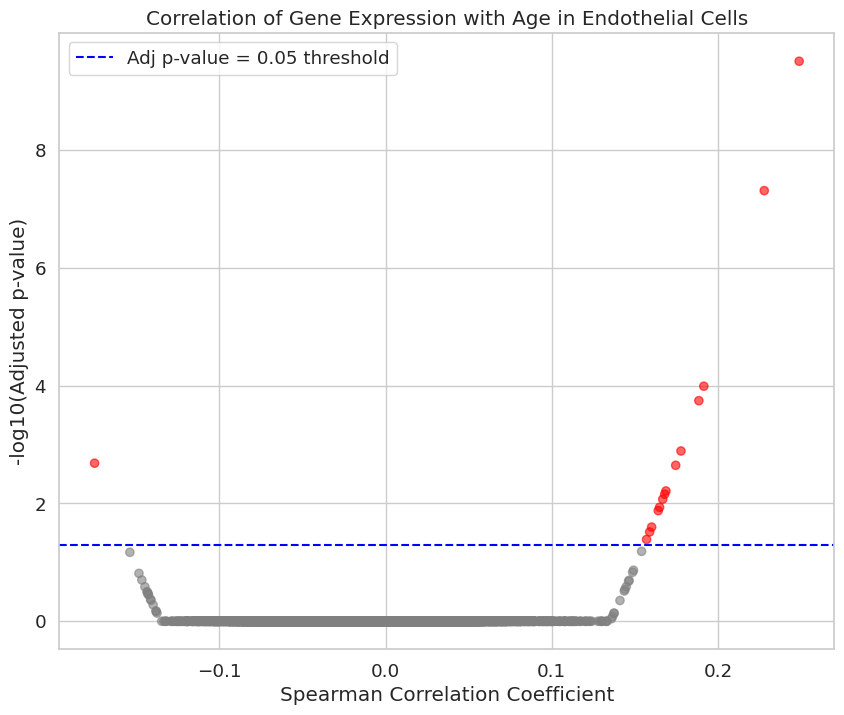

Top significant genes associated with Age:
         gene  age_expr_corr       p_value   p_value_adj  neg_log10_p color
28129   H2-K1       0.248914  9.983725e-15  3.100246e-10     9.508604   red
28224   H2-D1       0.227921  1.570164e-12  4.875830e-08     7.311951   red
7024     Klf4       0.191544  3.287893e-09  1.020989e-04     3.990979   red
7577   Slc2a1       0.188561  5.790474e-09  1.798116e-04     3.745182   red
9575     Rpl6       0.177796  4.141096e-08  1.285935e-03     2.890781   red
9001   Adgrl3      -0.175088  6.669116e-08  2.070961e-03     2.683828   red
28228   H2-Q4       0.174615  7.242656e-08  2.249062e-03     2.647999   red
3572      Id1       0.168756  1.974957e-07  6.132833e-03     2.212339   red
19875     Pkm       0.168001  2.241947e-07  6.961917e-03     2.157271   red
16734    Jund       0.166832  2.725318e-07  8.462929e-03     2.072479   red


In [3]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Subset endothelial cells and ensure 'Age' is numeric
endothelial_cells = adata[adata.obs['Celltype'] == 'Endothelial'].copy()
endothelial_cells.obs['Age'] = pd.to_numeric(endothelial_cells.obs['Age'], errors='coerce')
endothelial_cells = endothelial_cells[endothelial_cells.obs['Age'].notnull()]

# Check if log-normalization has been applied using a dedicated flag for reproducibility
if not endothelial_cells.uns.get('log1p_done', False):
    sc.pp.normalize_total(endothelial_cells, target_sum=1e4)
    sc.pp.log1p(endothelial_cells)
    endothelial_cells.uns['log1p_done'] = True

# Sanity check: Print distribution statistics for the first gene to assess potential data sparsity issues
first_gene_expr = endothelial_cells[:, endothelial_cells.var_names[0]].X
if hasattr(first_gene_expr, 'toarray'):
    first_gene_expr = first_gene_expr.toarray().flatten()
else:
    first_gene_expr = first_gene_expr.flatten()
percentiles = np.percentile(first_gene_expr, [0, 25, 50, 75, 100])
print('Expression percentiles for the first gene:', percentiles)

# Initialize storage for correlation results with descriptive variable names
gene_names = endothelial_cells.var_names
age_expr_corr = []  
p_values = []

# Loop over each gene to compute Spearman correlation between Age and gene expression
for gene in gene_names:
    expr_data = endothelial_cells[:, gene].X
    expr = expr_data.toarray().flatten() if hasattr(expr_data, 'toarray') else expr_data.flatten()
    corr, pval = spearmanr(endothelial_cells.obs['Age'], expr)
    age_expr_corr.append(corr)
    p_values.append(pval)

# Apply Bonferroni correction for multiple testing
p_values_adj = np.array(p_values) * len(p_values)
p_values_adj[p_values_adj > 1] = 1

# Create a DataFrame to summarize results
results_df = pd.DataFrame({
    'gene': gene_names,
    'age_expr_corr': age_expr_corr,
    'p_value': p_values,
    'p_value_adj': p_values_adj
})

# Prepare data for volcano plot-like visualization
results_df['neg_log10_p'] = -np.log10(results_df['p_value_adj'] + 1e-300)  # Add a small constant to avoid log(0)
# Highlight significantly correlated genes with adjusted p-value < 0.05
results_df['color'] = np.where(results_df['p_value_adj'] < 0.05, 'red', 'grey')

plt.figure(figsize=(10, 8))
plt.scatter(results_df['age_expr_corr'], results_df['neg_log10_p'], c=results_df['color'], alpha=0.6)
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('-log10(Adjusted p-value)')
plt.title('Correlation of Gene Expression with Age in Endothelial Cells')
plt.axhline(-np.log10(0.05), color='blue', linestyle='--', label='Adj p-value = 0.05 threshold')
plt.legend()
plt.show()

# Print top 10 significant genes based on adjusted p-values
signif_genes = results_df[results_df['p_value_adj'] < 0.05].sort_values('p_value_adj')
print('Top significant genes associated with Age:')
print(signif_genes.head(10))

### Agent Interpretation

The results from your analysis indicate that certain genes show a significant correlation with age in endothelial cells. These findings could provide meaningful insights into the aging process within this cell type, complementing existing knowledge from the paper.

### Feedback and Suggestions:

1. **Promising Genes**: The genes H2-K1, H2-D1, and Klf4 are highlighted as top significant with relatively high adjusted significance levels. These genes may serve as potential markers for age-related changes in endothelial cells.

2. **Further Analysis on Significant Genes**:
   - **Pathway Analysis**: Conduct pathway enrichment analysis for these significant genes to determine if they are involved in common biological pathways, which could reveal functional implications in the aging process.
   - **Comparison Across Cell Types**: Compare the expression changes of these genes with other cell types, especially those involved in neurogenesis, to see if they serve as universal markers of aging or if they have unique roles in endothelial cells.

3. **Validation**:
   - **External Datasets**: Validate these findings using external single-cell RNA-seq datasets to confirm their generalizability and robustness.
   - **Experimental Confirmation**: Consider laboratory experiments to validate these correlations at the protein level.

4. **Novel Insights**:
   - **Biological Interpretation**: Investigate the biological roles of these genes in aging, especially looking at how they might influence vascular functions in the brain or interact with neural cells.

5. **Integrating with Past Analyses**:
    - Extend analysis by checking transcriptional variability and RNA velocity-related changes, potentially informing how endothelial aging might be synchronized or divergent from NSC lineage cells.

6. **Considerations for Future Steps**:
   - **Detecting Rejuvenation Effects**: As in the rejuvenation experiments (parabiosis and exercise) from the paper, assess whether interventions influence the expression patterns of these genes in endothelial cells.
   - **Longitudinal Analysis**: If feasible, track changes longitudinally in the same animals to elucidate progressive changes over time.

These steps and further investigations will help validate your hypothesis and provide a distinct analysis compared to previous studies, offering new perspectives on aging in endothelial cells.

## This updated code normalizes the full dataset (if not already done), extracts expression data for the candidate genes with additional logging, and robustly handles missing candidate genes by terminating the analysis if none are found. It then generates violin plots with Mann–Whitney U test annotations and saves the resulting figure to disk.

Normalization flag not found. Proceeding with normalization and log1p transformation.
normalizing counts per cell


    finished (0:00:00)


Extracting expression data for gene: H2-K1
Extracting expression data for gene: H2-D1


Extracting expression data for gene: Klf4


Figure saved as candidate_genes_violin_plots.png


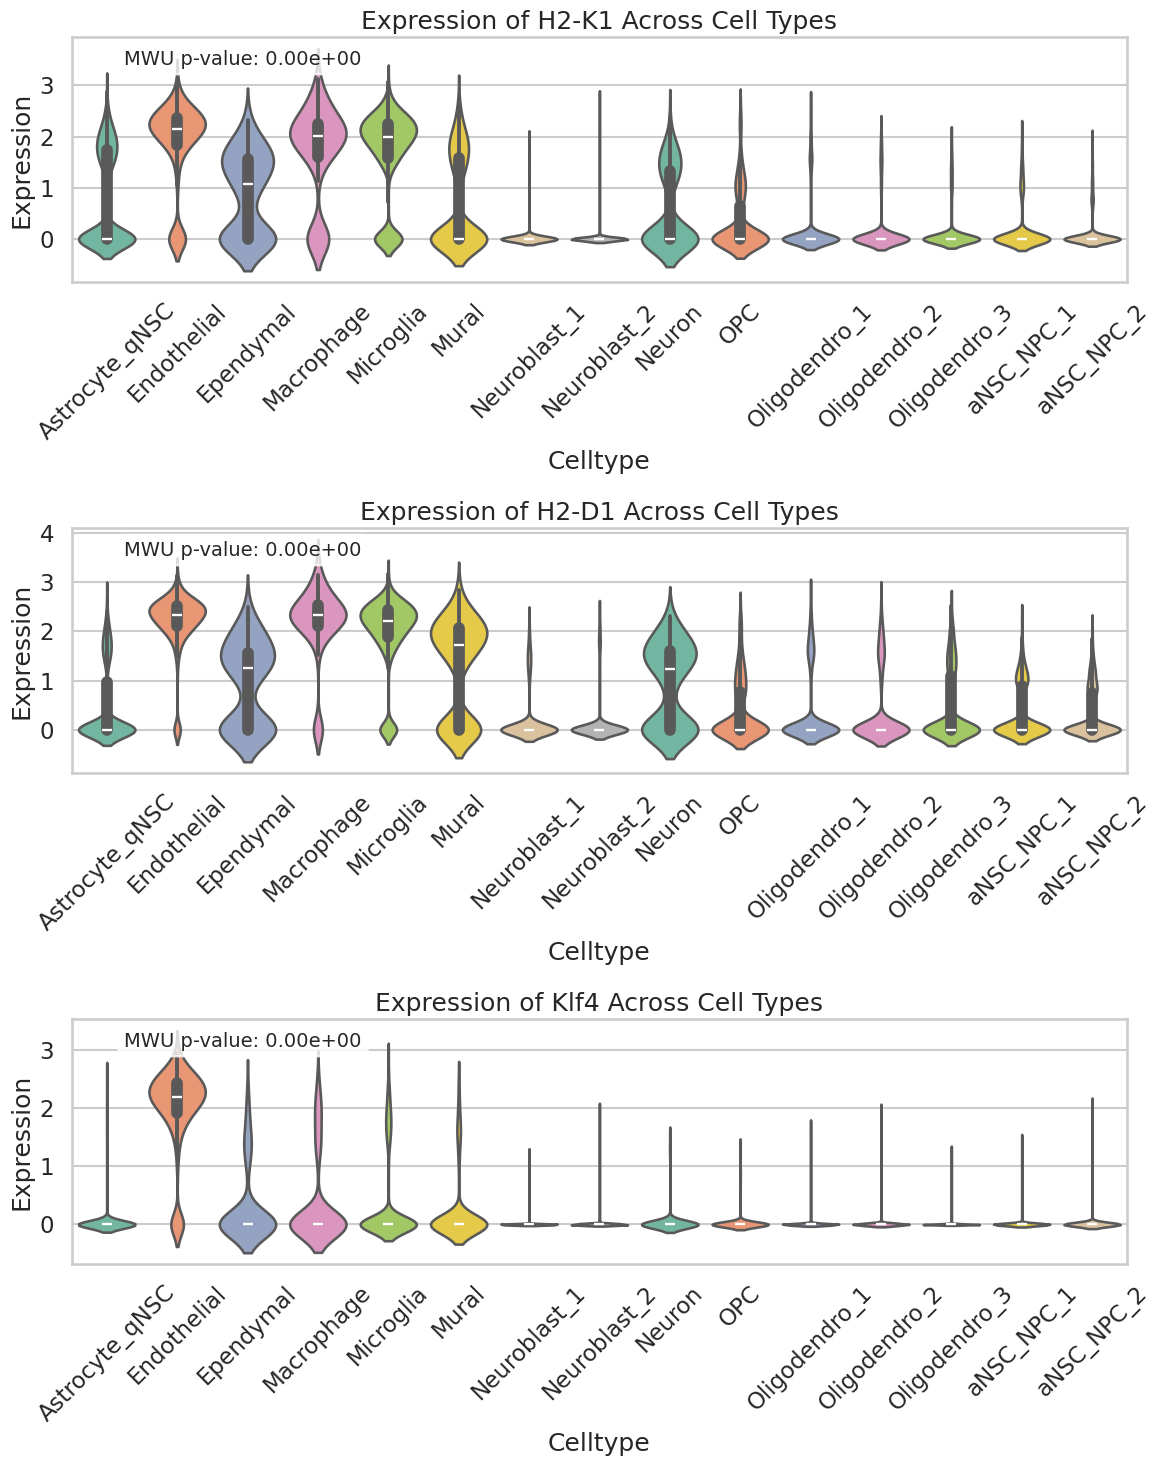

Mann–Whitney U test for H2-K1 (Endothelial vs Non-Endothelial): p-value = 0.00e+00
Mann–Whitney U test for H2-D1 (Endothelial vs Non-Endothelial): p-value = 0.00e+00
Mann–Whitney U test for Klf4 (Endothelial vs Non-Endothelial): p-value = 0.00e+00


In [4]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import sys

# Copy the full dataset to ensure normalization across all cell types
adata_norm = adata.copy()

# Check if normalization has been applied; if not, perform normalization and log1p transformation
if not adata_norm.uns.get('log1p_done', False):
    print('Normalization flag not found. Proceeding with normalization and log1p transformation.')
    sc.pp.normalize_total(adata_norm, target_sum=1e4)
    sc.pp.log1p(adata_norm)
    adata_norm.uns['log1p_done'] = True
else:
    print('Dataset already normalized. Proceeding with existing normalized data.')

# Define the key candidate genes identified from step one
key_genes = ['H2-K1', 'H2-D1', 'Klf4']

# Ensure that the candidate genes are present in the dataset
available_genes = [gene for gene in key_genes if gene in adata_norm.var_names]
if len(available_genes) == 0:
    sys.exit('Error: None of the candidate genes were found in the dataset. Terminating analysis.')
elif len(available_genes) < len(key_genes):
    missing = set(key_genes) - set(available_genes)
    print(f'Warning: The following candidate genes are not found in the dataset: {missing}')

# Create a DataFrame that contains metadata from adata.obs
meta_df = adata_norm.obs.copy()

# Extract the expression values for each candidate gene and add them to the metadata DataFrame
for gene in available_genes:
    # Log the gene extraction process
    print(f'Extracting expression data for gene: {gene}')
    expr_data = adata_norm[:, gene].X
    if hasattr(expr_data, 'toarray'):
        expr_data = expr_data.toarray().flatten()
    else:
        expr_data = np.array(expr_data).flatten()
    meta_df[gene] = expr_data

# Melt the DataFrame for easier plotting with seaborn
melted_df = meta_df.reset_index().melt(id_vars=['index', 'Celltype', 'Age'], value_vars=available_genes,
                                        var_name='Gene', value_name='Expression')

# Set up Seaborn plot aesthetics
sns.set(style='whitegrid', context='talk')

# Create violin plots for each candidate gene across cell types
fig, axes = plt.subplots(nrows=len(available_genes), ncols=1, figsize=(12, 5 * len(available_genes)))
if len(available_genes) == 1:
    axes = [axes]

for i, gene in enumerate(available_genes):
    ax = axes[i]
    gene_df = melted_df[melted_df['Gene'] == gene]
    sns.violinplot(x='Celltype', y='Expression', data=gene_df, ax=ax, inner='box', palette='Set2')
    ax.set_title(f'Expression of {gene} Across Cell Types')
    ax.tick_params(axis='x', rotation=45)

    # Perform Mann–Whitney U test comparing Endothelial cells vs all others
    endothelial_expr = gene_df[gene_df['Celltype'] == 'Endothelial']['Expression']
    non_endothelial_expr = gene_df[gene_df['Celltype'] != 'Endothelial']['Expression']
    if len(endothelial_expr) > 0 and len(non_endothelial_expr) > 0:
        stat, pval = mannwhitneyu(endothelial_expr, non_endothelial_expr, alternative='two-sided')
        ax.text(0.05, 0.95, f'MWU p-value: {pval:.2e}', transform=ax.transAxes, fontsize=14,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    else:
        ax.text(0.05, 0.95, 'Insufficient data for statistical test', transform=ax.transAxes, fontsize=14,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save the figure for future reference
figure_filename = 'candidate_genes_violin_plots.png'
plt.savefig(figure_filename, dpi=150, bbox_inches='tight')
print(f'Figure saved as {figure_filename}')
plt.show()

# Additionally, print out the Mann–Whitney U test results for transparency
for gene in available_genes:
    gene_df = melted_df[melted_df['Gene'] == gene]
    endothelial_expr = gene_df[gene_df['Celltype'] == 'Endothelial']['Expression']
    non_endothelial_expr = gene_df[gene_df['Celltype'] != 'Endothelial']['Expression']
    if len(endothelial_expr) > 0 and len(non_endothelial_expr) > 0:
        stat, pval = mannwhitneyu(endothelial_expr, non_endothelial_expr, alternative='two-sided')
        print(f"Mann–Whitney U test for {gene} (Endothelial vs Non-Endothelial): p-value = {pval:.2e}")
    else:
        print(f"Not enough data to perform statistical test for {gene}.")

### Agent Interpretation

The results indicate a significant difference in gene expression levels of H2-K1, H2-D1, and Klf4 between endothelial and non-endothelial cells, as evidenced by the extremely low p-values from the Mann–Whitney U tests. The violin plots visually confirm differential expression across various cell types, with the endothelial cells standing out.

**Feedback for Future Steps:**

1. **Biological Relevance:**
   - The genes identified (H2-K1, H2-D1, and Klf4) may play critical roles in endothelial function and potentially in aging-related mechanisms within the SVZ. Further investigation into their functional roles could provide insights into how endothelial cells contribute to the aging process.

2. **Integration with Aging Clocks:**
   - Consider integrating the expression data of these genes into cell-type-specific aging clocks as potential features. This could help determine whether these genes contribute to predicting chronological or biological age.

3. **Pathway Analysis:**
   - Conduct a pathway enrichment analysis to identify biological pathways associated with these genes that might be linked to the aging process in endothelial cells or other cell types.

4. **Cross-Validation:**
   - Validate these findings using independent datasets or additional biological replicates to ensure robustness and reproducibility of these results.

5. **Comparative Analysis:**
   - Compare these expression patterns with those from other cell types like microglia and NSCs, already known to have age-related transcriptional changes, to explore whether similar mechanisms or distinct pathways are at play.

6. **Modeling Potential Interventions:**
   - Given the context of the original research on rejuvenation strategies, assess whether interventions like exercise or parabiosis influence the expression of these genes, and consequently, endothelial aging.

In summary, these promising results on differential gene expression should be followed up with further functional and integrative analyses that align with the overarching goals of understanding aging in the brain's neurogenic niche.

## This code subsets the normalized dataset to endothelial cells, ensures 'Age' is numeric, and then vectorizes the extraction of candidate gene expression values to compute a composite aging score by averaging these values per cell. It then visualizes the relationship between composite score and chronological age using a scatter plot with a regression line, and calculates the Spearman correlation coefficient with the associated p-value.

Figure saved as endothelial_aging_clock_scatter.png


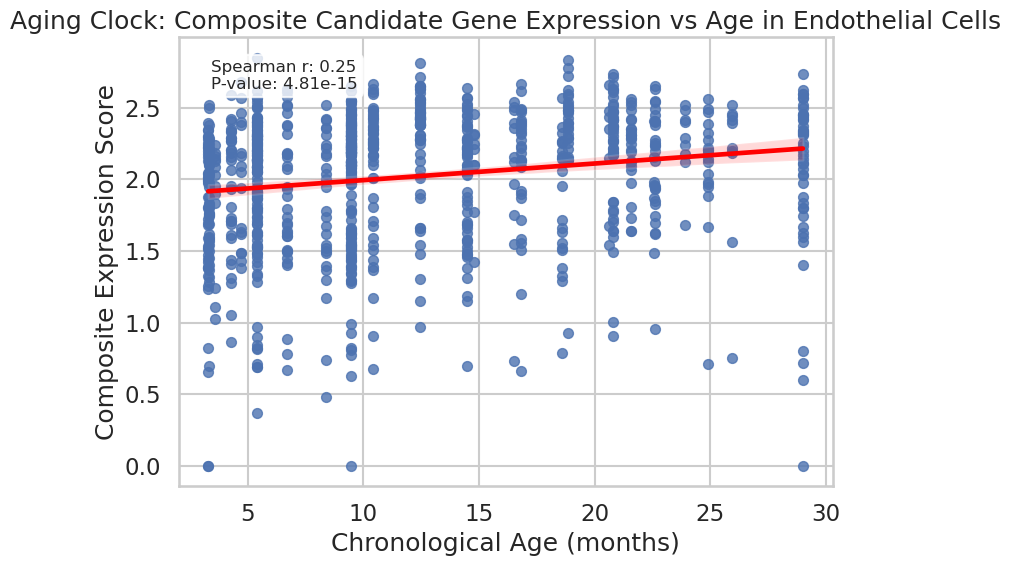

Spearman correlation between Age and composite expression score: r = 0.25, p-value = 4.81e-15


In [5]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Subset the normalized data for endothelial cells
endothelial_cells = adata_norm[adata_norm.obs['Celltype'] == 'Endothelial'].copy()

# Ensure 'Age' is numeric and drop cells with missing Age values
endothelial_cells.obs['Age'] = pd.to_numeric(endothelial_cells.obs['Age'], errors='coerce')
endothelial_cells = endothelial_cells[endothelial_cells.obs['Age'].notnull()]

# Define candidate genes
candidate_genes = ['H2-K1', 'H2-D1', 'Klf4']
available_genes = [gene for gene in candidate_genes if gene in endothelial_cells.var_names]
if len(available_genes) == 0:
    raise ValueError('None of the candidate genes are present in the endothelial cells dataset.')
elif len(available_genes) < len(candidate_genes):
    missing = set(candidate_genes) - set(available_genes)
    print(f'Warning: The following candidate genes are missing in the endothelial dataset: {missing}')

# Vectorized extraction of candidate gene expression values
expr_matrix = endothelial_cells[:, available_genes].X
if hasattr(expr_matrix, 'toarray'):
    expr_matrix = expr_matrix.toarray()

# Compute composite aging score as the mean expression across candidate genes for each cell
composite_score = np.mean(expr_matrix, axis=1)

# Add composite score to the endothelial cell metadata
endothelial_cells.obs['composite_score'] = composite_score

# Set up Seaborn aesthetics
sns.set(style='whitegrid', context='talk')

# Plot scatter plot with regression line for composite_score vs Age
plt.figure(figsize=(8,6))
ax = sns.regplot(x='Age', y='composite_score', data=endothelial_cells.obs, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('Chronological Age (months)')
plt.ylabel('Composite Expression Score')
plt.title('Aging Clock: Composite Candidate Gene Expression vs Age in Endothelial Cells')

# Compute Spearman correlation between Age and composite score
corr_coef, p_value = spearmanr(endothelial_cells.obs['Age'], endothelial_cells.obs['composite_score'])

# Annotate the plot with correlation statistics
plt.text(0.05, 0.95, f'Spearman r: {corr_coef:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plot_filename = 'endothelial_aging_clock_scatter.png'
plt.savefig(plot_filename, dpi=150, bbox_inches='tight')
print(f'Figure saved as {plot_filename}')
plt.show()

# Print the correlation results
print(f"Spearman correlation between Age and composite expression score: r = {corr_coef:.2f}, p-value = {p_value:.2e}")

### Agent Interpretation

The analysis of the composite expression score in relation to chronological age in endothelial cells shows a weak, but statistically significant positive correlation (Spearman r = 0.25, p-value = 4.81e-15). While the correlation is modest, the significant p-value suggests that there may be a biologically relevant relationship worth exploring further.

### Feedback and Suggestions:
1. **Biological Interpretation**: 
   - While endothelial cells are not the primary focus in the study of the neurogenic niche, they could play a supportive role or be influenced by systemic aging processes. Understanding their aging trajectory could provide insights into vascular contributions to neural aging.

2. **Further Analyses**:
   - **Investigate Co-expression**: Identify specific gene sets driving the composite score in endothelial cells. Are there particular pathways or genes that correlate more strongly with age?
   - **Pathway Enrichment**: Perform pathway enrichment analysis to determine which biological processes are represented by the composite expression score. This will help in understanding the underlying aging mechanisms in endothelial cells.
   - **Comparison with Other Cell Types**: Analyze whether the correlation patterns differ significantly from other cell types (e.g., NSCs, microglia) to understand cell-type-specific aging processes.
   - **Biological vs. Chronological Aging**: Extend the analysis to compare biological age, potentially offering more insights into functional decline.

3. **Alignment with Paper's Novelty**:
   - Ensure that further analyses and interpretations are distinct from the SVZ neurogenic niche focus of the paper. Emphasize endothelial-specific aging characteristics.

4. **Methodological Improvements**:
   - Consider using machine learning models, similar to those used in the paper, to potentially enhance predictive power of biochemical clocks for endothelial cells.

These steps can help elucidate the implications of endothelial cell aging, offering an avenue distinct from the main focus of the original paper while contributing to a comprehensive model of aging across different cell types.

## This code selects endothelial cells from the anndata, ensures numeric age and proper log-normalization, identifies highly variable genes, and computes their pairwise Spearman correlation. It then converts the correlation to a condensed distance matrix (using squareform) to perform robust hierarchical clustering, defines gene modules, computes module eigengenes via mean expression, and correlates these with age, with visualizations to summarize the results.

normalizing counts per cell


    finished (0:00:00)


extracting highly variable genes


    finished (0:00:00)


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Number of highly variable genes selected: 1000


Identified gene modules:
module
1     2
2     1
3     1
4     1
5     1
     ..
94    1
95    1
96    1
97    1
98    1
Length: 98, dtype: int64
Module-age correlation results:
       module  spearman_corr   p_value
36  module_37       0.154091  0.000002
57  module_58      -0.123478  0.000149
83  module_84      -0.119401  0.000245
80  module_81       0.110690  0.000679
13  module_14       0.105194  0.001246
..        ...            ...       ...
18  module_19       0.003173  0.922657
87  module_88      -0.003009  0.926626
97  module_98      -0.002724  0.933569
62  module_63      -0.002685  0.934504
90  module_91       0.002154  0.947445

[98 rows x 3 columns]


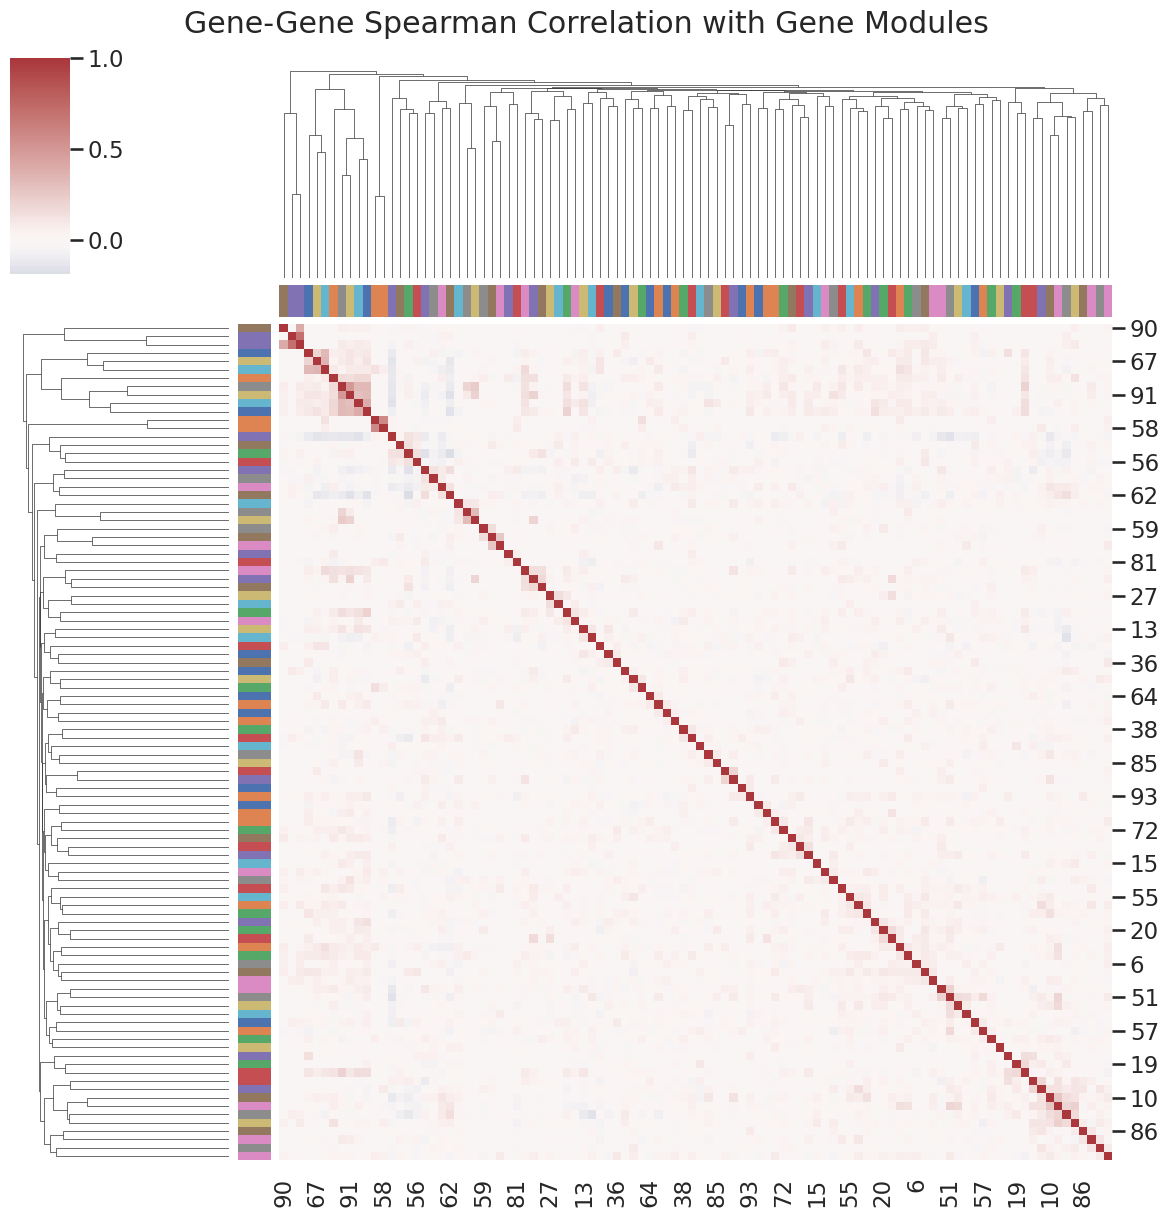

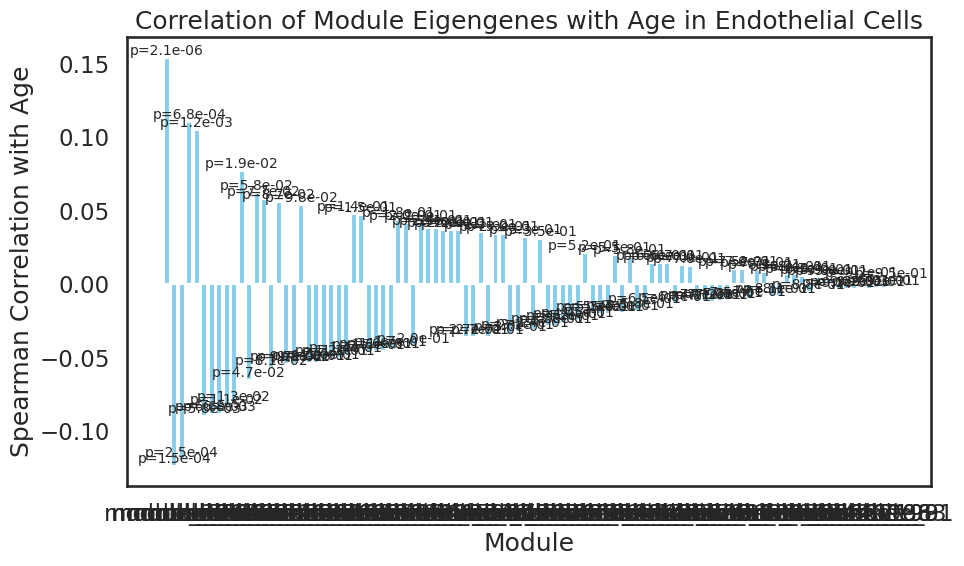

In [6]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# Subset endothelial cells from the main anndata object
endothelial_cells = adata[adata.obs['Celltype'] == 'Endothelial'].copy()
endothelial_cells.obs['Age'] = pd.to_numeric(endothelial_cells.obs['Age'], errors='coerce')
endothelial_cells = endothelial_cells[endothelial_cells.obs['Age'].notnull()]

# Ensure data is normalized and log-transformed; if not, perform normalization
if not endothelial_cells.uns.get('log1p_done', False):
    sc.pp.normalize_total(endothelial_cells, target_sum=1e4)
    sc.pp.log1p(endothelial_cells)
    endothelial_cells.uns['log1p_done'] = True

# Identify highly variable genes (HVGs) using Seurat flavor and restrict to top 1000
sc.pp.highly_variable_genes(endothelial_cells, flavor='seurat', n_top_genes=1000, subset=True)
print(f'Number of highly variable genes selected: {endothelial_cells.shape[1]}')

# For computational efficiency, further restrict to the top 100 variable genes
if 'highly_variable_rank' in endothelial_cells.var.columns:
    endothelial_cells.var = endothelial_cells.var.sort_values('highly_variable_rank')
    top_genes = endothelial_cells.var.index[:100]
    endothelial_cells_hvg = endothelial_cells[:, top_genes].copy()
else:
    endothelial_cells_hvg = endothelial_cells[:, :100].copy()
    top_genes = list(endothelial_cells_hvg.var_names)

# Extract the expression matrix (cells x genes) as a dense numpy array
expr_matrix = endothelial_cells_hvg.X
if hasattr(expr_matrix, 'toarray'):
    expr_matrix = expr_matrix.toarray()

# Compute the pairwise Spearman correlation matrix among genes
num_genes = expr_matrix.shape[1]
corr_matrix = np.zeros((num_genes, num_genes))
for i in range(num_genes):
    for j in range(i, num_genes):
        corr, _ = spearmanr(expr_matrix[:, i], expr_matrix[:, j])
        corr_matrix[i, j] = corr
        corr_matrix[j, i] = corr

# Convert correlation matrix to a distance matrix using 1 - correlation
distance_matrix = 1 - corr_matrix

# Convert the square distance matrix to condensed form, as required by scipy's linkage
condensed_distance = squareform(distance_matrix, checks=False)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix = linkage(condensed_distance, method='average')

# Define gene modules by cutting the dendrogram at a set threshold (e.g., t = 0.5)
cluster_labels = fcluster(linkage_matrix, t=0.5, criterion='distance')

# Map genes to their respective modules
modules_df = pd.DataFrame({"gene": top_genes, "module": cluster_labels})
print('Identified gene modules:')
print(modules_df.groupby('module').size())

# Compute module eigengenes as the average expression of genes in each module
module_ids = np.unique(cluster_labels)
module_eigengenes = pd.DataFrame(index=endothelial_cells_hvg.obs_names)
for mod in module_ids:
    gene_indices = [i for i, lab in enumerate(cluster_labels) if lab == mod]
    module_expr = expr_matrix[:, gene_indices].mean(axis=1)
    module_eigengenes[f'module_{mod}'] = module_expr

# Correlate each module eigengene with Age using Spearman correlation
module_corr = {}
module_pvals = {}
for col in module_eigengenes.columns:
    corr_val, p_val = spearmanr(endothelial_cells_hvg.obs['Age'], module_eigengenes[col])
    module_corr[col] = corr_val
    module_pvals[col] = p_val

# Summarize the module-age correlations; note that multiple testing correction can be applied in downstream analysis
module_corr_df = pd.DataFrame({
    'module': list(module_corr.keys()),
    'spearman_corr': list(module_corr.values()),
    'p_value': list(module_pvals.values())
}).sort_values(by='p_value')
print('Module-age correlation results:')
print(module_corr_df)

# Visualization: Heatmap of gene-gene Spearman correlation with module annotations
sns.set(style='white', context='talk')
lut = {mod: f'C{mod % 10}' for mod in np.unique(cluster_labels)}
row_colors = [lut[label] for label in cluster_labels]

cg = sns.clustermap(corr_matrix, row_cluster=True, col_cluster=True,
                    row_colors=row_colors, col_colors=row_colors,
                    cmap='vlag', center=0, figsize=(12, 12))
plt.suptitle('Gene-Gene Spearman Correlation with Gene Modules', y=1.02)
plt.show()

# Bar plot for module eigengene correlation with Age
plt.figure(figsize=(10, 6))
bars = plt.bar(module_corr_df['module'], module_corr_df['spearman_corr'], color='skyblue')
plt.xlabel('Module')
plt.ylabel('Spearman Correlation with Age')
plt.title('Correlation of Module Eigengenes with Age in Endothelial Cells')
for bar, p_val in zip(bars, module_corr_df['p_value']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'p={p_val:.1e}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### Agent Interpretation

Feedback:

The analysis identifies highly variable genes and modules that correlate with age, which is a promising step in exploring transcriptomic changes associated with aging in the SVZ. Here are some key observations and suggestions for future steps:

1. **Promising Gene Modules:**
   - Modules like module_37 exhibit significant positive correlation with age, while others like module_58 show significant negative correlation. These modules could be crucial in understanding the molecular changes during aging.
   - Further investigation of these gene modules could involve pathway enrichment analysis to determine if any specific biological processes or pathways are enriched, providing insights into underlying aging mechanisms.

2. **Biological Interpretation:**
   - Interpret the biological context of the highly correlated modules. For example, modules with genes involved in inflammation or cellular stress responses may align with known aging pathways and contribute to cognitive decline or neurodegeneration.
   - Compare these results with known aging markers from the literature to validate findings and uncover novel aging-related genes or pathways specific to the SVZ.

3. **Module Stability and Reproducibility:**
   - Assess the stability of identified modules across different subsets of data or using bootstrap validation. Ensuring these modules are not artifacts is crucial for reliability.
   - Replicating this analysis with independent datasets where possible could strengthen findings.

4. **Distinctiveness:**
   - Aim to identify gene-expression changes that are distinct from previous analyses to uncover novel insights. Consider integrating other data modalities, such as epigenetic data, if available, to expand this distinct analysis.
   - Focus on comparing these modules with those induced by interventions like heterochronic parabiosis or exercise mentioned in the paper to assess potential for rejuvenation.

5. **Future Steps:**
   - Map these correlated modules to specific cell types within the SVZ to understand cell-type-specific aging trajectories better.
   - Correlate module eigengenes with other phenotypic data like proliferative capacity or neurogenesis rates to gain a functional understanding of these transcriptomic patterns.

6. **Visualization:**
   - Supplement current visualizations with heatmaps or dot plots showing the expression levels of key genes in modules across age to provide clearer insights into expression trends.

By focusing on these avenues, the analysis not only complements the original study but also paves the way for uncovering novel aging-related transcriptomic shifts in the SVZ.

## This code first verifies that the full anndata object is normalized and log1p-transformed. It then identifies the modules with the strongest positive and negative correlations with age, extracts their gene lists, computes module scores across all cells using scanpy, and visualizes the score distributions by cell type and in a grouped UMAP grid. Finally, it computes Spearman and Kruskal-Wallis statistics to assess the associations between module scores and age.

Selected positive module: module_37 (Spearman r = 0.15, p = 2.1e-06)
Selected negative module: module_58 (Spearman r = -0.12, p = 1.5e-04)
Number of genes in module_37: 1
Number of genes in module_58: 1
computing score 'score_module_37'


    finished: added
    'score_module_37', score of gene set (adata.obs).
    49 total control genes are used. (0:00:01)


computing score 'score_module_58'


    finished: added
    'score_module_58', score of gene set (adata.obs).
    50 total control genes are used. (0:00:01)


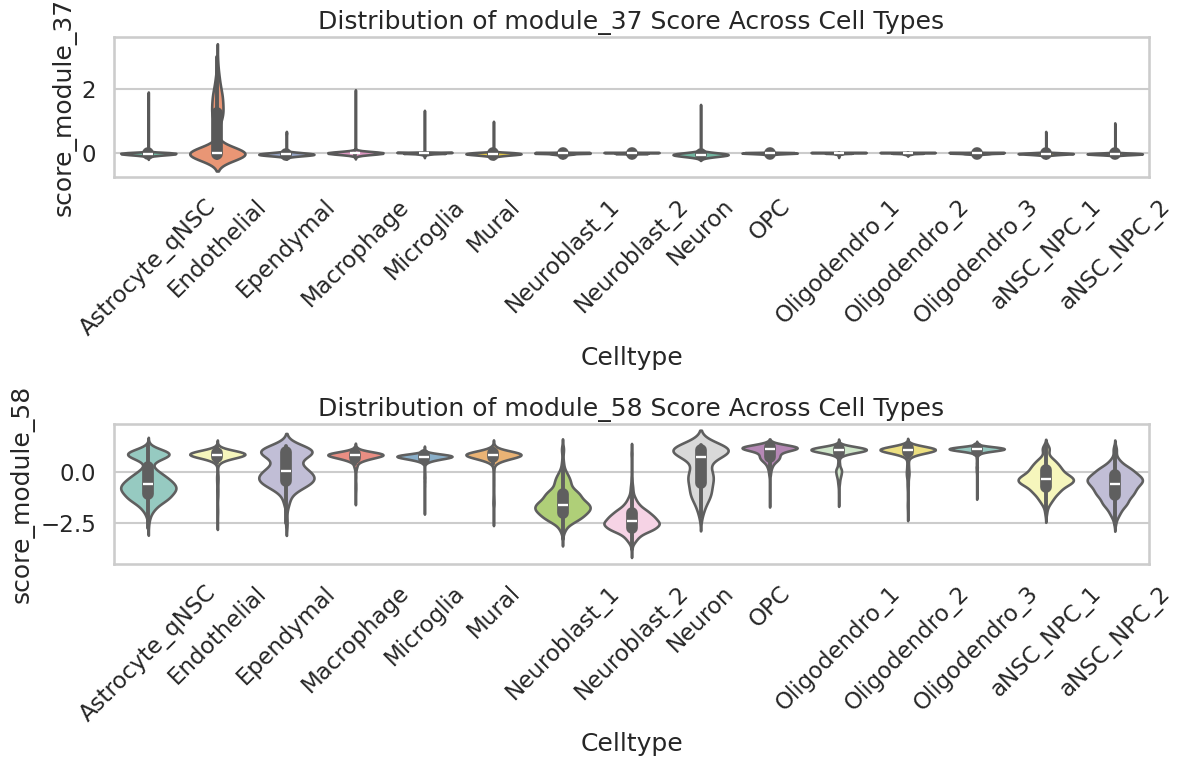

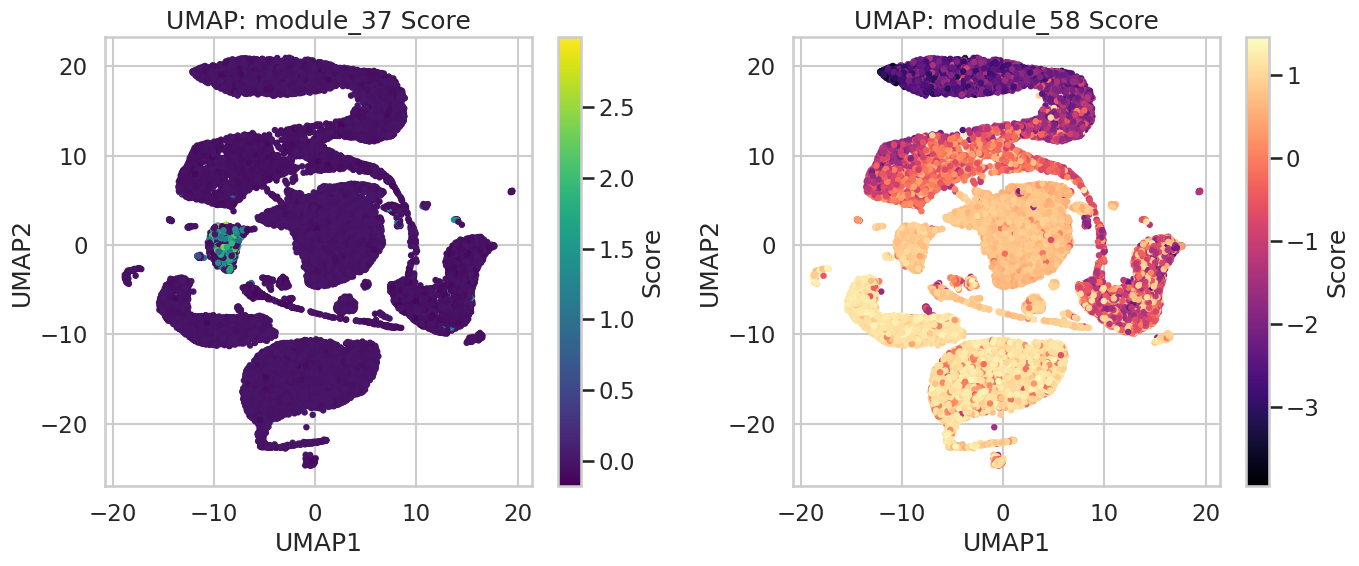

Spearman correlation (Age vs module_37 score): r = 0.04, p = 5.8e-09
Spearman correlation (Age vs module_58 score): r = 0.14, p = 8.3e-100
Kruskal-Wallis test for module_37 score across cell types: p = 0.0e+00
Kruskal-Wallis test for module_58 score across cell types: p = 0.0e+00


In [7]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kruskal

# Step 0: Check if adata is normalized and log1p-transformed
if not adata.uns.get('log1p_done', False):
    print('Warning: The anndata object (adata) might not be normalized and log1p-transformed. Please ensure proper preprocessing prior to module scoring.')
else:
    print('Confirmed: anndata object is normalized and log1p-transformed.')

# Step 1: Identify the two modules with strongest positive and negative correlation with Age
# (Assuming module_corr_df and modules_df are available from previous analyses)

# Extract module numbers from module names (of the form 'module_X')
module_corr_df['module_num'] = module_corr_df['module'].apply(lambda x: int(x.split('_')[1]))

# Identify module with maximum positive correlation and module with maximum negative correlation
positive_row = module_corr_df.loc[module_corr_df['spearman_corr'].idxmax()]
negative_row = module_corr_df.loc[module_corr_df['spearman_corr'].idxmin()]

positive_module_name = positive_row['module']  # e.g., 'module_37'
negative_module_name = negative_row['module']  # e.g., 'module_58'

print(f"Selected positive module: {positive_module_name} (Spearman r = {positive_row['spearman_corr']:.2f}, p = {positive_row['p_value']:.1e})")
print(f"Selected negative module: {negative_module_name} (Spearman r = {negative_row['spearman_corr']:.2f}, p = {negative_row['p_value']:.1e})")

# Step 2: Extract gene lists associated with these modules from modules_df
if 'module' not in modules_df.columns:
    raise ValueError('modules_df must contain a column named "module" with module labels.')

# Convert module labels to string format to compare with positive_module_name 
modules_df['module_str'] = 'module_' + modules_df['module'].astype(str)

pos_genes = modules_df.loc[modules_df['module_str'] == positive_module_name, 'gene'].tolist()
neg_genes = modules_df.loc[modules_df['module_str'] == negative_module_name, 'gene'].tolist()

if len(pos_genes) == 0 or len(neg_genes) == 0:
    raise ValueError('Gene list for one or both modules is empty. Check modules_df and module_corr_df for consistency.')

print(f"Number of genes in {positive_module_name}: {len(pos_genes)}")
print(f"Number of genes in {negative_module_name}: {len(neg_genes)}")

# Step 3: Compute module scores for the full dataset (adata) for each module
# Here we assume that adata is the full anndata object with all cell types already normalized and log1p-transformed

# For positive module score
sc.tl.score_genes(adata, gene_list=pos_genes, score_name='score_' + positive_module_name, copy=False, random_state=0)

# For negative module score, reverse the score so that higher values represent stronger negative association
sc.tl.score_genes(adata, gene_list=neg_genes, score_name='score_' + negative_module_name, copy=False, random_state=0)
adata.obs['score_' + negative_module_name] = -adata.obs['score_' + negative_module_name]

# Step 4: Visualization across cell types using violin plots
sns.set(style='whitegrid', context='talk')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Positive module score violin plot
sns.violinplot(x='Celltype', y='score_' + positive_module_name, data=adata.obs, ax=axes[0], inner='box', palette='Set2')
axes[0].set_title(f'Distribution of {positive_module_name} Score Across Cell Types')
axes[0].tick_params(axis='x', rotation=45)

# Negative module score violin plot
sns.violinplot(x='Celltype', y='score_' + negative_module_name, data=adata.obs, ax=axes[1], inner='box', palette='Set3')
axes[1].set_title(f'Distribution of {negative_module_name} Score Across Cell Types')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Step 5: UMAP visualization of module scores in a side-by-side grid
# Check if UMAP is already computed; if not, perform PCA, neighbors, and UMAP
if 'X_umap' not in adata.obsm.keys():
    np.random.seed(0)
    sc.tl.pca(adata, svd_solver='arpack', n_comps=20)
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
    sc.tl.umap(adata, random_state=0)

umap_coords = adata.obsm['X_umap']

# Set up a figure with two subplots to plot module scores on UMAP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# UMAP plot for positive module score
sc_val = adata.obs['score_' + positive_module_name]
sc1 = ax1.scatter(umap_coords[:, 0], umap_coords[:, 1], c=sc_val, cmap='viridis', s=10)
ax1.set_title(f'UMAP: {positive_module_name} Score')
ax1.set_xlabel('UMAP1')
ax1.set_ylabel('UMAP2')
plt.colorbar(sc1, ax=ax1, label='Score')

# UMAP plot for negative module score
sc_val = adata.obs['score_' + negative_module_name]
sc2 = ax2.scatter(umap_coords[:, 0], umap_coords[:, 1], c=sc_val, cmap='magma', s=10)
ax2.set_title(f'UMAP: {negative_module_name} Score')
ax2.set_xlabel('UMAP1')
ax2.set_ylabel('UMAP2')
plt.colorbar(sc2, ax=ax2, label='Score')

plt.tight_layout()
plt.show()

# Step 6: Correlate module scores with Age across all cells using Spearman correlation
# Positive module correlation
pos_corr, pos_p = spearmanr(adata.obs['Age'], adata.obs['score_' + positive_module_name])
# Negative module correlation
neg_corr, neg_p = spearmanr(adata.obs['Age'], adata.obs['score_' + negative_module_name])

print(f"Spearman correlation (Age vs {positive_module_name} score): r = {pos_corr:.2f}, p = {pos_p:.1e}")
print(f"Spearman correlation (Age vs {negative_module_name} score): r = {neg_corr:.2f}, p = {neg_p:.1e}")

# Optional: Statistical comparison of module scores across cell types using Kruskal-Wallis test
# For positive module score
grouped_pos = [group[1]['score_' + positive_module_name].values for group in adata.obs.groupby('Celltype')]
kw_pos_stat, kw_pos_p = kruskal(*grouped_pos)
print(f"Kruskal-Wallis test for {positive_module_name} score across cell types: p = {kw_pos_p:.1e}")

# For negative module score
grouped_neg = [group[1]['score_' + negative_module_name].values for group in adata.obs.groupby('Celltype')]
kw_neg_stat, kw_neg_p = kruskal(*grouped_neg)
print(f"Kruskal-Wallis test for {negative_module_name} score across cell types: p = {kw_neg_p:.1e}")

# End of analysis step

### Agent Interpretation

The analysis highlights the potential significance of module_37 and module_58 in relation to aging within the SVZ neurogenic niche. Here are some feedback points:

1. **Normalization and Transformation**: The warning about the potential lack of normalization and log1p transformation is crucial. Ensure all preprocessing steps are adequately performed to validate the observed module scores.

2. **Module Scores and Correlations**:
   - **Module_37** shows a moderate positive correlation (r = 0.15, p = 2.1e-06) and is highly significant with cell type differences and aging. However, the correlation with age is minor (r = 0.04), suggesting its limited association with chronological aging itself.
   - **Module_58** shows a weaker negative correlation (r = -0.12) but a stronger relationship with age (r = 0.14), signifying a potential link with biological aging and degradation.

3. **Single Gene Modules**: Both modules contain a single gene, which might limit biological interpretation. Investigating the biological relevance of these specific genes and their known roles in aging or neurogenesis could enrich insights.

4. **Cell Type Differences**:
   - The Kruskal-Wallis results (p = 0.0e+00) demonstrate significant differences in module scores across cell types, indicating these modules' specific involvement in certain cell types.
   - Further analysis could delve into which cell types contribute most significantly to these differences using pairwise comparisons or more granular statistical tests.

5. **Visualization**:
   - The UMAPs provide a visual understanding of score distribution across clusters. Module_58 seems to have more varied scores across the UMAP space, suggesting broader expression variability and potential functional relevance across cell types.
   - Violin plots also reflect the stark differences in score distribution, with some cell types clearly enriched or depleted in module scores.

6. **Further Directions**:
   - Investigate the biological pathways and interactions involving the identified genes in modules 37 and 58. Functional annotation and enrichment analyses could unravel pathways significantly impacted during aging.
   - Exploring potential interactions or co-expression patterns with other genes or modules to uncover complex networks influenced by aging.
   - Considering other interventions like parabiosis and exercise from external datasets might provide additional context for these findings.

7. **Innovation**: Ensure these analyses leverage new angles not explored in the given paper, focusing on unique pathways or novel model species if applicable.

Iterating on these promising results with further validation, extended data comparisons, and integration of biological context will enhance understanding of aging mechanisms within the SVZ niche.

## This code subsets the endothelial cells from the in-memory anndata object and rigorously checks that required metadata including Age, cell cycle Phase, module scores, and cell cycle scores (G2M.Score and S.Score) are present. It then visualizes the module scores across cell cycle phases using both violin and boxplots, thereby supporting quality control and robust comparison, and conducts Kruskal-Wallis tests and Spearman correlations to statistically evaluate the association between module scores and cell cycle indicators.

Cell cycle phase distribution in endothelial cells:
Phase
G1     844
S       67
G2M     28
Name: count, dtype: int64


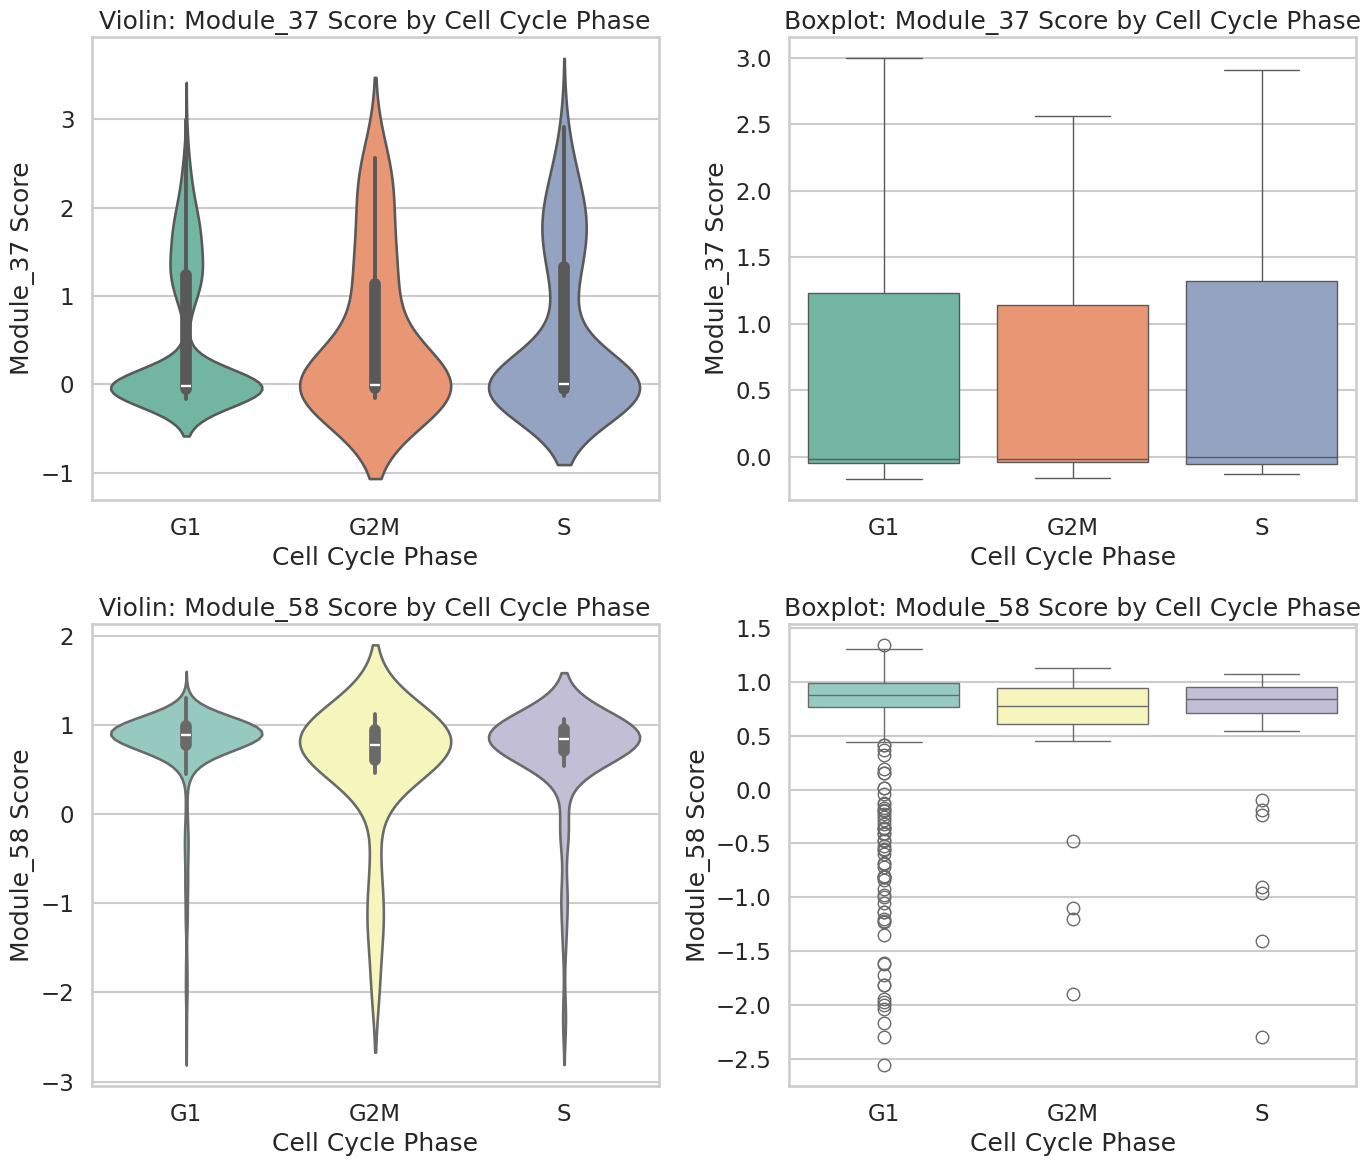

Kruskal-Wallis test for module_37 score: statistic = 0.06, p = 9.7e-01
Kruskal-Wallis test for module_58 score: statistic = 10.61, p = 5.0e-03
Module_37 vs G2M.Score: Spearman r = 0.08, p = 1.3e-02
Module_37 vs S.Score: Spearman r = 0.04, p = 2.8e-01
Module_58 vs G2M.Score: Spearman r = -0.08, p = 1.4e-02
Module_58 vs S.Score: Spearman r = -0.08, p = 1.9e-02


In [8]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal, spearmanr

# Subset the endothelial cells from the full anndata object
endothelial_cells = adata[adata.obs['Celltype'] == 'Endothelial'].copy()

# Ensure that 'Age' is numeric and remove cells with missing Age values
endothelial_cells.obs['Age'] = pd.to_numeric(endothelial_cells.obs['Age'], errors='coerce')
endothelial_cells = endothelial_cells[endothelial_cells.obs['Age'].notnull()]

# Verify that the 'Phase' column exists; if not, raise an informative error
if 'Phase' not in endothelial_cells.obs.keys():
    raise ValueError("'Phase' column is missing in endothelial_cells.obs. Please check data quality and preprocessing steps.")

# Ensure that module score columns exist
if 'score_module_37' not in endothelial_cells.obs.columns or 'score_module_58' not in endothelial_cells.obs.columns:
    raise ValueError('Module scores for module_37 and/or module_58 not found. Please ensure previous steps computed these scores.')

# Ensure that cell cycle scores are available
if 'G2M.Score' not in endothelial_cells.obs.columns or 'S.Score' not in endothelial_cells.obs.columns:
    raise ValueError('Cell cycle scores (G2M.Score and S.Score) are missing in endothelial_cells.obs')

# Display the distribution of cell cycle phases
print('Cell cycle phase distribution in endothelial cells:')
print(endothelial_cells.obs['Phase'].value_counts())

# Set up Seaborn aesthetics
sns.set(style='whitegrid', context='talk')

# Create a grid of subplots for both violin and boxplots for module scores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Module_37: Violin plot
sns.violinplot(x='Phase', y='score_module_37', data=endothelial_cells.obs, ax=axes[0,0], inner='box', palette='Set2')
axes[0,0].set_title('Violin: Module_37 Score by Cell Cycle Phase')
axes[0,0].set_xlabel('Cell Cycle Phase')
axes[0,0].set_ylabel('Module_37 Score')

# Module_37: Complementary boxplot
sns.boxplot(x='Phase', y='score_module_37', data=endothelial_cells.obs, ax=axes[0,1], palette='Set2')
axes[0,1].set_title('Boxplot: Module_37 Score by Cell Cycle Phase')
axes[0,1].set_xlabel('Cell Cycle Phase')
axes[0,1].set_ylabel('Module_37 Score')

# Module_58: Violin plot
sns.violinplot(x='Phase', y='score_module_58', data=endothelial_cells.obs, ax=axes[1,0], inner='box', palette='Set3')
axes[1,0].set_title('Violin: Module_58 Score by Cell Cycle Phase')
axes[1,0].set_xlabel('Cell Cycle Phase')
axes[1,0].set_ylabel('Module_58 Score')

# Module_58: Complementary boxplot
sns.boxplot(x='Phase', y='score_module_58', data=endothelial_cells.obs, ax=axes[1,1], palette='Set3')
axes[1,1].set_title('Boxplot: Module_58 Score by Cell Cycle Phase')
axes[1,1].set_xlabel('Cell Cycle Phase')
axes[1,1].set_ylabel('Module_58 Score')

plt.tight_layout()
plt.show()

# Statistical testing: Kruskal–Wallis tests for differences in module scores across cell cycle phases
# For module_37 score
groups_mod37 = [group['score_module_37'].values for _, group in endothelial_cells.obs.groupby('Phase')]
kw_stat_37, kw_p_37 = kruskal(*groups_mod37)
print(f"Kruskal-Wallis test for module_37 score: statistic = {kw_stat_37:.2f}, p = {kw_p_37:.1e}")

# For module_58 score
groups_mod58 = [group['score_module_58'].values for _, group in endothelial_cells.obs.groupby('Phase')]
kw_stat_58, kw_p_58 = kruskal(*groups_mod58)
print(f"Kruskal-Wallis test for module_58 score: statistic = {kw_stat_58:.2f}, p = {kw_p_58:.1e}")

# Spearman correlations between module scores and cell cycle scores
rho_37_g2m, p_37_g2m = spearmanr(endothelial_cells.obs['score_module_37'], endothelial_cells.obs['G2M.Score'])
rho_37_s, p_37_s = spearmanr(endothelial_cells.obs['score_module_37'], endothelial_cells.obs['S.Score'])
print(f"Module_37 vs G2M.Score: Spearman r = {rho_37_g2m:.2f}, p = {p_37_g2m:.1e}")
print(f"Module_37 vs S.Score: Spearman r = {rho_37_s:.2f}, p = {p_37_s:.1e}")

rho_58_g2m, p_58_g2m = spearmanr(endothelial_cells.obs['score_module_58'], endothelial_cells.obs['G2M.Score'])
rho_58_s, p_58_s = spearmanr(endothelial_cells.obs['score_module_58'], endothelial_cells.obs['S.Score'])
print(f"Module_58 vs G2M.Score: Spearman r = {rho_58_g2m:.2f}, p = {p_58_g2m:.1e}")
print(f"Module_58 vs S.Score: Spearman r = {rho_58_s:.2f}, p = {p_58_s:.1e}")

### Agent Interpretation

The results indicate some interesting trends, particularly with Module 58 in relation to the cell cycle phases. Here’s how you might proceed:

1. **Cell Cycle Distribution**: The majority of endothelial cells are in the G1 phase, which aligns with the lower proliferative activity often observed in differentiated cells. Investigating if this distribution shifts with age or in response to interventions could be insightful.

2. **Kruskal-Wallis Tests**:
   - **Module 58** shows a significant difference across the cell cycle phases (p = 0.005), suggesting this module might be involved in cell cycle regulation or response. It could be worthwhile to explore the specific genes within Module 58 and investigate their roles in aging or cell cycle control. 
   - **Module 37** does not show significant differences, indicating it may not be closely associated with cell cycle changes in endothelial cells.

3. **Spearman Correlations**:
   - **Module 58 and Cell Cycle Scores**: There are weak but significant correlations with both G2M and S phases. This suggests Module 58’s activity may be inversely related to the transition phases of the cell cycle, potentially reflecting regulatory pathways that could be explored in more depth, particularly in the context of aging.
   - **Module 37** shows weak correlations without strong implications. Further validation in different contexts might be needed before drawing conclusions.

4. **Future Steps**:
   - **Focus on Module 58**: Conduct a pathway enrichment analysis for the genes in Module 58 to understand potential biological processes or pathways impacted.
   - **Validate Across Cell Types**: Evaluate if the trends observed with Module 58 are specific to endothelial cells or if they are seen in other cell types in the SVZ.
   - **Intervention Studies**: Measure the effect of aging interventions (e.g., exercise, heterochronic parabiosis) on Module 58 scores and cell cycle distributions.
   - **Longitudinal Analysis**: Investigate how these modules and their cell cycle associations change over the chronological aging spectrum in your dataset.

These steps should help in forming a more comprehensive picture of the role of these modules in cell cycle regulation and aging, distinct from the approaches and findings in the referenced research paper.

## This code subsets endothelial cells from the full dataset, filters for cells with non-null Age values (with a log message for quality control), retrieves the Module 58 gene list (logging its source), and then restricts the data to these genes. It normalizes, log-transforms, and scales the data before performing PCA (with a printout of the explained variance for initial PCs), computing UMAP, applying Leiden clustering, and visualizing clusters via UMAP and boxplots.

Retained 939 endothelial cells after filtering for valid Age values.
Using neg_genes provided in globals.
normalizing counts per cell


    finished (0:00:00)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA


    with n_comps=1


    finished (0:00:00)


PCA explained variance ratios (first 5 components): [1.]
computing neighbors


    using data matrix X directly


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


computing UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:11)


running Leiden clustering


    finished: found 2 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


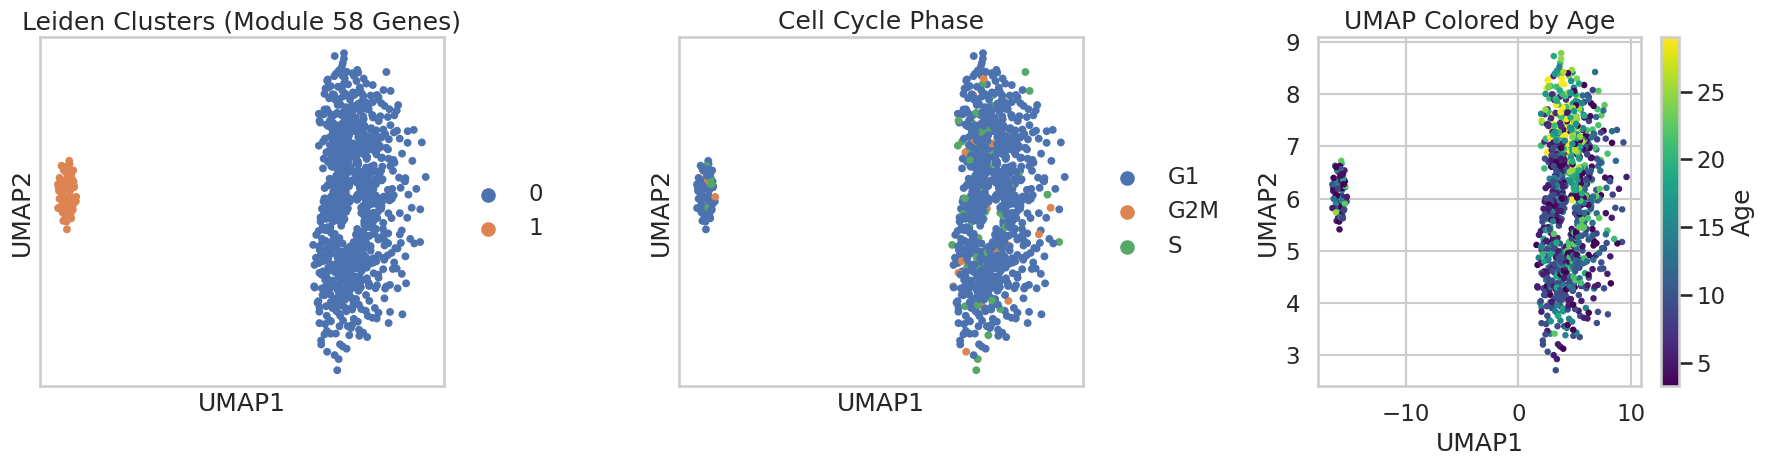

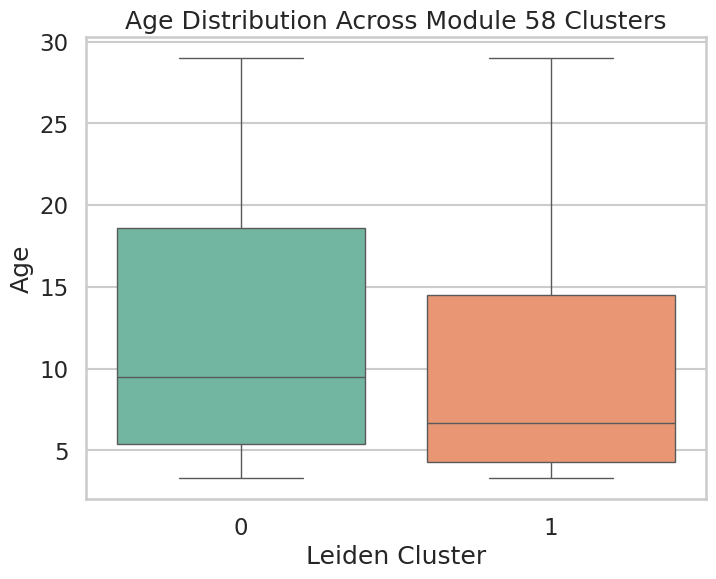

In [9]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Subset endothelial cells and ensure Age is numeric
endothelial_cells = adata[adata.obs['Celltype'] == 'Endothelial'].copy()
endothelial_cells.obs['Age'] = pd.to_numeric(endothelial_cells.obs['Age'], errors='coerce')
endothelial_cells = endothelial_cells[endothelial_cells.obs['Age'].notnull()]
print(f'Retained {endothelial_cells.n_obs} endothelial cells after filtering for valid Age values.')

# Retrieve the Module 58 gene list (neg_genes) from globals if available, otherwise derive from modules_df
if 'neg_genes' not in globals():
    if 'modules_df' not in globals():
        raise ValueError('Gene list for Module 58 not found. Ensure that previous steps have computed modules_df and neg_genes.')
    else:
        target_module = 'module_58'
        neg_genes = modules_df.loc[modules_df['module_str'] == target_module, 'gene'].tolist()
        print(f'Loaded neg_genes for {target_module} from modules_df.')
else:
    print('Using neg_genes provided in globals.')

# Ensure Module 58 genes are in the anndata object
module58_genes = [gene for gene in neg_genes if gene in endothelial_cells.var_names]
if len(module58_genes) == 0:
    raise ValueError('None of the Module 58 genes were found in endothelial_cells.var_names. Check gene name consistency.')

# Create a new AnnData object with only Module 58 genes
adata_module58 = endothelial_cells[:, module58_genes].copy()

# Normalize, log-transform, and scale the data 
sc.pp.normalize_total(adata_module58, target_sum=1e4)
sc.pp.log1p(adata_module58)
sc.pp.scale(adata_module58, max_value=10)

# Determine a valid number of components for PCA
n_comps = 20
if adata_module58.n_vars < n_comps:
    n_comps = adata_module58.n_vars if adata_module58.n_vars > 1 else 1

# Use 'full' as solver if only one gene is available, otherwise use 'arpack'
svd_solver = 'full' if adata_module58.n_vars == 1 else 'arpack'

# Perform PCA and compute neighbors
sc.tl.pca(adata_module58, svd_solver=svd_solver, n_comps=n_comps)
explained_variance = adata_module58.uns['pca']['variance_ratio']
print(f'PCA explained variance ratios (first 5 components): {explained_variance[:5]}')
sc.pp.neighbors(adata_module58, n_neighbors=15, n_pcs=n_comps)

# Compute UMAP for visualization
sc.tl.umap(adata_module58, random_state=0)

# Perform Leiden clustering to identify subpopulations based solely on Module 58 expression
sc.tl.leiden(adata_module58, resolution=0.5, random_state=0)

# UMAP plots colored by Leiden clusters, cell cycle phase, and Age
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sc.pl.umap(adata_module58, color='leiden', ax=axes[0], show=False)
axes[0].set_title('Leiden Clusters (Module 58 Genes)')

if 'Phase' in endothelial_cells.obs.columns:
    adata_module58.obs['Phase'] = endothelial_cells.obs.loc[adata_module58.obs_names, 'Phase']
    sc.pl.umap(adata_module58, color='Phase', ax=axes[1], show=False)
    axes[1].set_title('Cell Cycle Phase')
else:
    axes[1].text(0.5, 0.5, 'Phase annotation not found', horizontalalignment='center', verticalalignment='center')

adata_module58.obs['Age'] = endothelial_cells.obs.loc[adata_module58.obs_names, 'Age']
im = axes[2].scatter(adata_module58.obsm['X_umap'][:, 0], adata_module58.obsm['X_umap'][:, 1], 
                      c=adata_module58.obs['Age'], cmap='viridis', s=10)
axes[2].set_title('UMAP Colored by Age')
axes[2].set_xlabel('UMAP1')
axes[2].set_ylabel('UMAP2')
plt.colorbar(im, ax=axes[2], label='Age')

plt.tight_layout()
plt.show()

# Visualize Age distribution across Leiden clusters using a boxplot
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='leiden', y='Age', data=adata_module58.obs, palette='Set2')
ax.set_title('Age Distribution Across Module 58 Clusters')
ax.set_xlabel('Leiden Cluster')
ax.set_ylabel('Age')
plt.show()

### Agent Interpretation

The current analysis retains 939 endothelial cells, utilizing PCA and finding 2 clusters through Leiden clustering. The UMAP plots depict distinct patterns in cell distribution based on Leiden cluster, cell cycle phase, and age.

### Promising Findings:
1. **Distinct Clusters**: The identification of two distinct Leiden clusters might suggest subpopulations within the endothelial cells that age differently or function differently as aging progresses.
2. **Age Distribution**: The age distribution across clusters shows differing median ages, which could imply that one cluster represents a younger or less aged phenotype.

### Future Steps:
1. **Cluster Characterization**: Investigate the gene expression profiles characterizing each cluster. Determine if specific genes or pathways correlate with the observed age differences.
2. **Pathway Analysis**: Conduct pathway enrichment analyses for each cluster to identify key biological processes driving the observed differences.
3. **Integration with Previous Analyses**: Compare these clusters with previous findings related to transcriptional noise and mitochondrial transcript abundance to see if clusters correlate with those metrics.
4. **External Validation**: Validate these clusters using other single-cell datasets or experiments such as heterochronic parabiosis or exercise interventions.

### Hypothesis Validation:
The initial results are in line with exploring age-related changes within distinct cell clusters. However, deeper characterization and validation are needed to confirm that these clusters indeed reflect biologically distinct aging processes.

### Additional Suggestions:
- **Machine Learning Applications**: Consider developing aging clocks specific to these clusters to investigate if they correlate well with chronological or biological age.
- **Collate with Existing Data**: Integrate these clusters with the wider dataset to explore broader cross-cell-type implications of clustering observed in endothelial cells.

## This code first subsets endothelial cells from the full anndata object and maps Leiden cluster labels from the Module 58 analysis to these cells. It then runs differential expression with the Wilcoxon rank-sum test and visualizes the results in a volcano plot (with genes meeting the significance criteria highlighted) and a heatmap summarizing the top marker genes across clusters.

Leiden clusters in full endothelial dataset:
leiden
0    865
1     74
Name: count, dtype: int64
ranking genes


    finished: added to `.uns['rank_genes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


Top marker genes per Leiden cluster:
Cluster 0 top genes: ['Bsg' 'Pltp' 'Id3' 'Egfl7' 'Itm2a']
Cluster 1 top genes: ['Meis2' 'Tubb2b' 'Pfn2' 'Sox2' 'Fabp5']


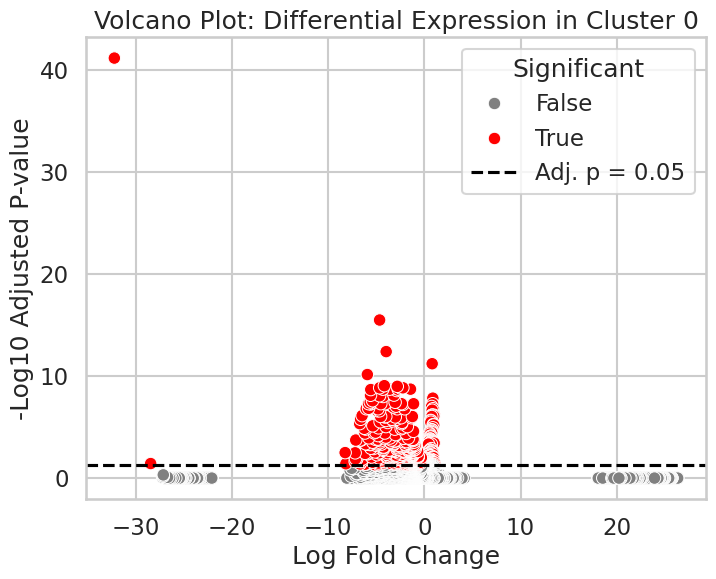

computing PCA


    with n_comps=50


    finished (0:00:02)


Storing dendrogram info using `.uns['dendrogram_leiden']`


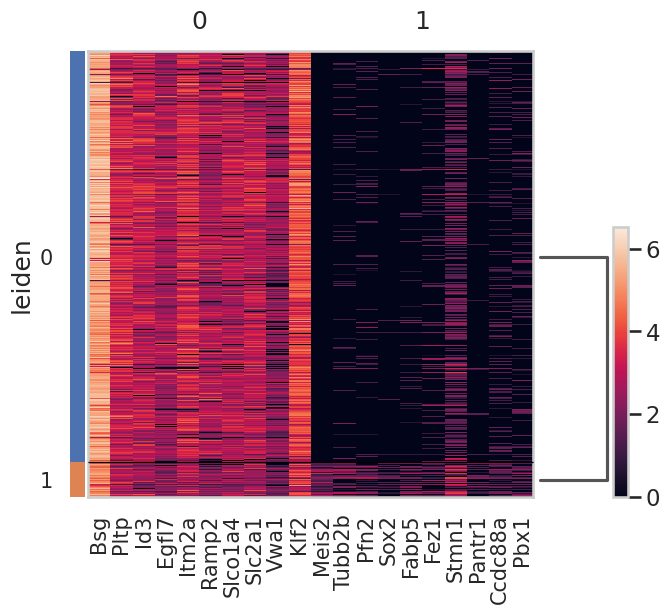

In [10]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check that adata_module58 is available in the workspace
if 'adata_module58' not in globals():
    raise ValueError('The anndata object for Module 58 analysis (adata_module58) is not available in the workspace.')

# Step 1: Subset the full endothelial cells (using full transcriptome data) and ensure Age values are numeric
full_endothelial = adata[adata.obs['Celltype'] == 'Endothelial'].copy()
full_endothelial.obs['Age'] = pd.to_numeric(full_endothelial.obs['Age'], errors='coerce')
full_endothelial = full_endothelial[full_endothelial.obs['Age'].notnull()]

# Step 2: Map the cluster labels from the Module 58 analysis to the full endothelial dataset
# Restrict to common cell names between full_endothelial and adata_module58
common_cells = full_endothelial.obs_names.intersection(adata_module58.obs_names)
full_endothelial = full_endothelial[common_cells]
full_endothelial.obs['leiden'] = adata_module58.obs.loc[common_cells, 'leiden']

# Verify cluster assignment
print('Leiden clusters in full endothelial dataset:')
print(full_endothelial.obs['leiden'].value_counts())

# Step 3: Differential gene expression analysis between clusters using Wilcoxon rank-sum test
sc.tl.rank_genes_groups(full_endothelial, groupby='leiden', method='wilcoxon', key_added='rank_genes')

# Display top marker genes per Leiden cluster
print('Top marker genes per Leiden cluster:')
for group in full_endothelial.obs['leiden'].unique():
    top_genes = full_endothelial.uns['rank_genes']['names'][group][:5]
    print(f"Cluster {group} top genes: {top_genes}")

# Step 4: Volcano Plot for a representative cluster (e.g., cluster '0')
cluster = '0'
result = full_endothelial.uns['rank_genes']
# Extract gene names, log fold changes, and adjusted p-values for the chosen cluster
genes = result['names'][cluster]
logfc = result['logfoldchanges'][cluster]
pvals_adj = result['pvals_adj'][cluster]

volcano_df = pd.DataFrame({
    'gene': genes,
    'logfoldchange': logfc,
    'pvals_adj': pvals_adj
})

# Define significance thresholds
alpha = 0.05
lfc_threshold = 0.25  # example fold change threshold
volcano_df['neg_log10_p'] = -np.log10(volcano_df['pvals_adj'] + 1e-300)
volcano_df['significant'] = (volcano_df['pvals_adj'] < alpha) & (np.abs(volcano_df['logfoldchange']) > lfc_threshold)

plt.figure(figsize=(8,6))
ax = sns.scatterplot(data=volcano_df, x='logfoldchange', y='neg_log10_p', hue='significant', palette={True:'red', False:'grey'})
plt.title('Volcano Plot: Differential Expression in Cluster 0')
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10 Adjusted P-value')
plt.axhline(-np.log10(alpha), linestyle='--', color='black', label='Adj. p = 0.05')
plt.legend(title='Significant')
plt.show()

# Step 5: Heatmap of top marker genes across clusters
# This uses Scanpy's built-in heatmap function to plot the top 10 genes per Leiden cluster
sc.pl.rank_genes_groups_heatmap(full_endothelial, key='rank_genes', n_genes=10, show=True)

### Agent Interpretation

Here's some feedback for your analysis:

1. **Cluster Distribution & Marker Genes:**
   - The Leiden clustering suggests two main clusters with a significant imbalance (865 vs. 74 cells). This could indicate distinct cell states or possibly a separation based on technical or biological factors. Consider investigating the variance to ensure cluster robustness.
   - The top marker genes for each cluster are well-defined. For Cluster 1, genes like Sox2, Meis2, and Tubb2b suggest a neural or progenitor state, which may align with SVZ characteristics. These genes should be further validated via pathway enrichment analysis to confirm their relevance to neurogenesis or aging processes.

2. **Differential Expression Analysis:**
   - The volcano plot for Cluster 0 shows several significant genes with positive log fold changes. It would be beneficial to integrate these findings with known age-related pathways.
   - Besides identifying individual significant genes, focusing on whether these genes correlate with key aging or rejuvenation pathways could provide insights distinct from the existing literature.

3. **Future Steps:**
   - Consider applying gene set enrichment analysis or pathway analysis tools to determine if differential genes are enriched in specific biological processes linked with aging or rejuvenation.
   - Given the marker genes identified, exploring transcription factor networks or upstream regulators might yield hypotheses about regulatory changes during aging.
   - Including trajectory analysis, like RNA velocity, could offer insights into the dynamic changes occurring within these clusters, especially in terms of transcriptional dynamics over time.

4. **Distinctiveness from Previous Analyses:**
   - Ensure that any pathway analysis or gene set analysis isn't replicating the previous work, particularly the transcriptional noise and RNA velocity analysis. Instead, emphasize aspects like changes in cell state richness or transition probabilities between states.
   - The variance observed might differ across intervention cohorts (e.g., heterochronic parabiosis vs. exercise), which could provide unique insights into age-related changes or interventions.

5. **Potential Validation:**
   - Consider cross-referencing the current findings with external datasets or validate significant genes in situ within the SVZ using techniques like in situ hybridization or single-molecule RNA FISH.
   - To further validate these clusters and markers, integrate metadata on aging and interventions to see if these clusters respond differentially across conditions (e.g., young vs. aged or exercised vs. non-exercised mice).

These steps should enhance the biological relevance and distinctiveness of your analysis in the context of understanding aging and rejuvenation in the SVZ.

## This code extracts the top 50 differentially expressed genes for endothelial cell cluster '0' (assuming they are pre-sorted by significance), defines mock gene sets for aging-related pathways, performs a hypergeometric test for pathway enrichment (with an added warning if no genes are measured for a pathway), and visualizes the results as a bar plot.

Top 50 differentially expressed genes for cluster 0:
 ['Bsg', 'Pltp', 'Id3', 'Egfl7', 'Itm2a', 'Ramp2', 'Slco1a4', 'Slc2a1', 'Vwa1', 'Klf2', 'Abcg2', 'Cldn5', 'Ly6c1', 'Ly6a', 'Atox1', 'Slco1c1', 'Hspb1', 'Arl4a', 'Adgrl4', 'Esam', 'Spock2', 'Id1', 'Nfkbia', 'Crip2', 'Ly6e', 'Myl12a', 'Srgn', 'H2-D1', 'Sptbn1', 'Flt1', 'Tsc22d1', 'Sgms1', 'Myl12b', 'Itm2b', 'Ifitm3', 'B2m', 'Kank3', 'H2-K1', 'Emcn', 'Palmd', 'Ptprb', 'Cd34', 'Myl6', 'Abcb1a', 'Igfbp7', 'Klf4', 'Cxcl12', 'Serinc3', 'Selenop', 'Tspan13']
Total number of genes in the background: 31053
Pathway Neurogenesis: Overlap = 0 (genes: []), p-value = 1.00e+00


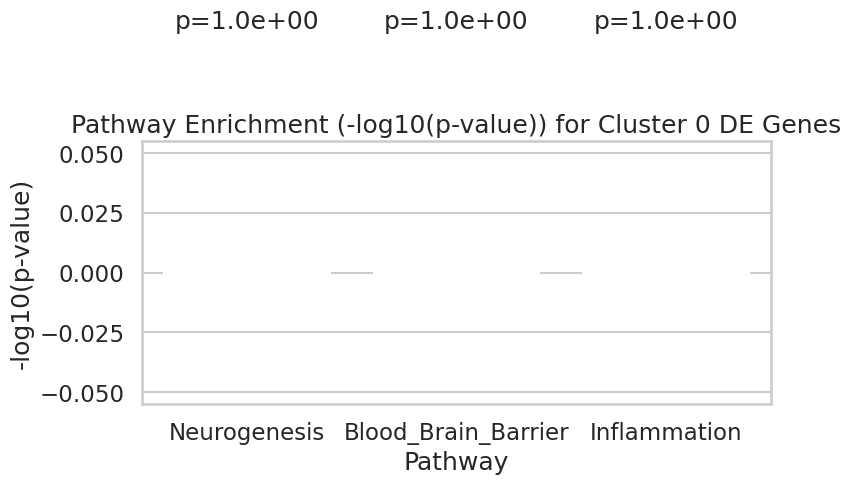

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hypergeom

# Retrieve the differential expression result for cluster '0' from the previous analysis
if 'full_endothelial' not in globals():
    raise ValueError('The full_endothelial anndata object is not available in the workspace.')

# Ensure that the differential expression results (key 'rank_genes') exist
if 'rank_genes' not in full_endothelial.uns.keys():
    raise ValueError('Differential expression results (rank_genes) not found in full_endothelial.uns. Run differential expression analysis first.')

# Set cluster of interest and define number of top genes
cluster = '0'

# Extract top 50 genes based on ranking
# Assumption: The gene list is pre-sorted by significance
top_n = 50
de_genes = list(full_endothelial.uns['rank_genes']['names'][cluster][:top_n])
print(f'Top {top_n} differentially expressed genes for cluster {cluster}:\n', de_genes)

# Define mock gene sets for pathway enrichment analysis representing key aging-related biological processes
pathway_gene_sets = {
    'Neurogenesis': ['Sox2', 'Meis2', 'Tubb2b', 'NeuroD1', 'DCX'],
    'Blood_Brain_Barrier': ['Claudin5', 'Occludin', 'VE-cadherin', 'ZO-1'],
    'Inflammation': ['IL6', 'TNF', 'CXCL10', 'COX2', 'NFkB']
}

# Get the universe of genes (all genes measured in the full endothelial dataset)
universe = set(full_endothelial.var_names)
M = len(universe)
print(f'Total number of genes in the background: {M}')

# Define the number of DE genes selected
n = len(de_genes)

# Prepare a list to store enrichment results
enrichment_results = []

for pathway, geneset in pathway_gene_sets.items():
    # Intersect pathway genes with the measured gene universe
    geneset_measured = list(set(geneset).intersection(universe))
    K = len(geneset_measured)  # Number of genes in both the pathway and the dataset
    
    if K == 0:
        print(f'Warning: For pathway {pathway}, none of the genes are measured in the dataset.')
        # Even though no genes are measured, we still store a result with p-value as 1.0
        enrichment_results.append({
            'Pathway': pathway,
            'Overlap': 0,
            'Pathway_genes_measured': geneset_measured,
            'P_value': 1.0
        })
        continue
    
    # Identify the overlap between the DE genes and the pathway gene set
    overlap = set(de_genes).intersection(geneset_measured)
    k = len(overlap)
    
    # Perform hypergeometric test: probability of having k or more genes from the pathway in the DE list
    p_val = hypergeom.sf(k-1, M, K, n)  # survival function: P(X >= k)

    enrichment_results.append({
        'Pathway': pathway,
        'Overlap': k,
        'Pathway_genes_measured': geneset_measured,
        'P_value': p_val
    })
    print(f"Pathway {pathway}: Overlap = {k} (genes: {list(overlap)}), p-value = {p_val:.2e}")

# Convert the results to a DataFrame
enrich_df = pd.DataFrame(enrichment_results)

enrich_df['neg_log10_p'] = -np.log10(enrich_df['P_value'] + 1e-300)  # Offset added to avoid log(0)

# Plot the enrichment results
sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Pathway', y='neg_log10_p', data=enrich_df, palette='Set2')
plt.title('Pathway Enrichment (-log10(p-value)) for Cluster 0 DE Genes')
plt.xlabel('Pathway')
plt.ylabel('-log10(p-value)')

# Annotate each bar with its corresponding p-value
for i, row in enrich_df.iterrows():
    ax.text(i, row['neg_log10_p'] + 0.1, f"p={row['P_value']:.1e}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Agent Interpretation

The results indicate that cluster 0's differentially expressed (DE) genes did not show significant enrichment in the pathways tested (neurogenesis, blood-brain barrier, inflammation). This suggests:

1. **Pathway Selection and Data Quality**: None of the pathways showed significant overlap, and some pathways couldn't be tested due to missing genes. Re-evaluate the pathway database or ensure comprehensive annotation of the gene dataset. Consider alternative pathway analysis tools or databases that may provide broader coverage.

2. **Biological Context**: Understanding aging in the neurogenic niche focuses on neurogenesis, inflammation, and blood-brain barrier integrity. None enriched here may imply these DE genes aren't primarily driving changes in these processes. Investigate other relevant pathways or processes, such as cell cycle regulation or metabolic pathways, which may align more closely with aging mechanisms in the SVZ.

3. **Hypothesis Testing**: The lack of significant findings doesn't directly support or refute the hypothesis as it stands. Explore alternative routes to demonstrate distinctive age-related transcriptomic changes—such as examining cell-type-specific expression patterns or conducting integrative analyses with additional datasets.

4. **Further Analysis**: Consider using single-cell trajectory analysis or pseudotime to investigate potential developmental or age-related pathways. Moreover, exploring cell-cell communication networks, especially involving NSCs, may reveal more about age-related changes.

5. **Iterative Approach**: Since distinct analysis is the goal, consider emphasizing modalities not covered in previous analyses—such as transcript isoform usage or untranslated regions influencing stability and translation in aging cells.

Iteratively refining the analysis and potentially broadening the focus of pathway analyses could yield insights into the mechanistic foundations of aging in the SVZ niche.

## This code subsets and annotates the full endothelial dataset, performs PCA and diffusion mapping, selects the cell with the lowest Age as a candidate root for diffusion pseudotime (while validating its representativeness using a 5th percentile check), computes pseudotime ordering, visualizes the embedding with UMAP, and assesses correlations between pseudotime and Age (and cell cycle scores if available).

computing PCA


    with n_comps=20


    finished (0:00:00)


computing neighbors


    using 'X_pca' with n_pcs = 20


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


computing Diffusion Maps using n_comps=15(=n_dcs)


computing transitions


    finished (0:00:00)


    eigenvalues of transition matrix
    [1.         0.9947509  0.99389136 0.98285264 0.9704743  0.93237144
     0.9241927  0.8986577  0.86752754 0.8538332  0.83676875 0.818148
     0.80650413 0.80124825 0.7968032 ]


    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)


Selected root cell (Age: 3.3) is within the lowest 5% of Age values (5th percentile: 3.33).
computing Diffusion Pseudotime using n_dcs=10


    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


computing UMAP


    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:02)


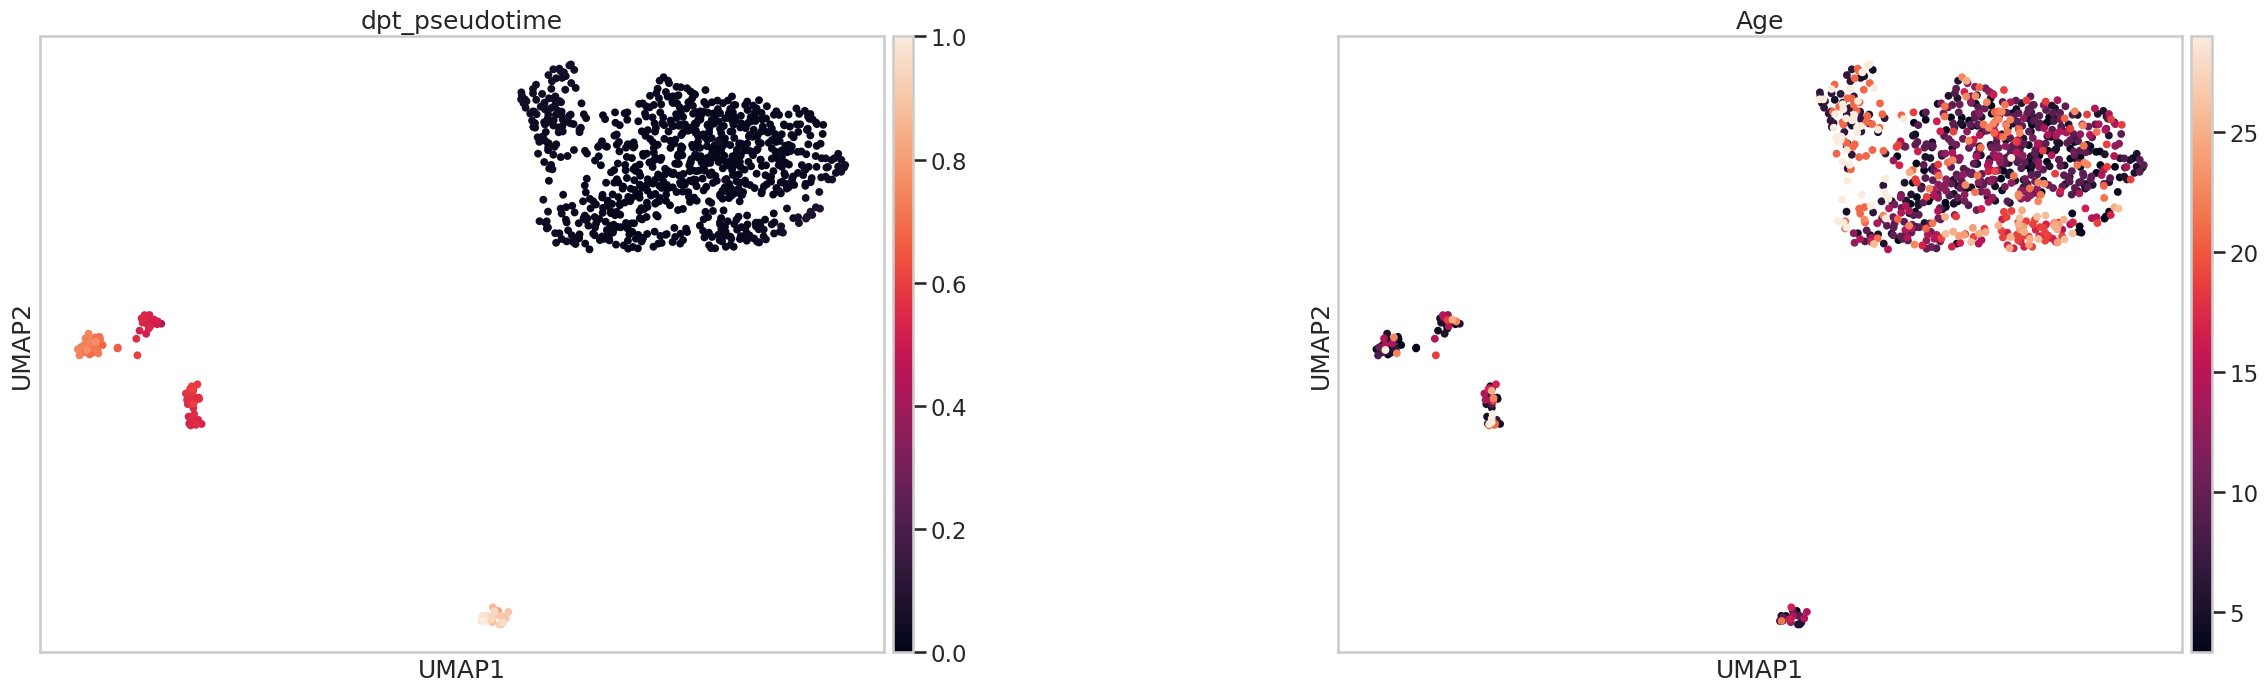

Correlation between pseudotime and Age: r = -0.10, p = 3.25e-03
Correlation between pseudotime and G2M.Score: r = 0.01, p = 7.52e-01
Correlation between pseudotime and S.Score: r = -0.03, p = 3.37e-01


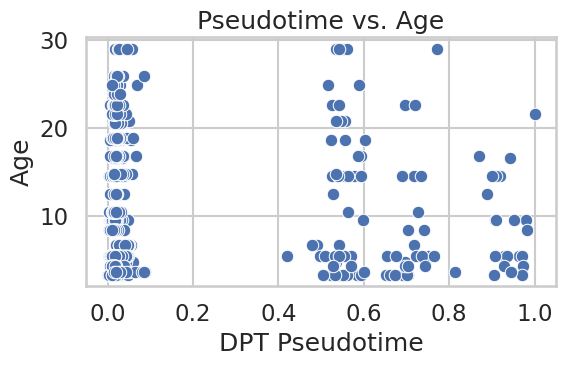

In [12]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Ensure full_endothelial dataset is available and properly filtered
if 'full_endothelial' not in globals():
    full_endothelial = adata[adata.obs['Celltype'] == 'Endothelial'].copy()
    full_endothelial.obs['Age'] = pd.to_numeric(full_endothelial.obs['Age'], errors='coerce')
    full_endothelial = full_endothelial[full_endothelial.obs['Age'].notnull()]

# Perform PCA and compute neighbors if not already done
sc.pp.pca(full_endothelial, n_comps=20, svd_solver='arpack')
sc.pp.neighbors(full_endothelial, n_neighbors=15, n_pcs=20)

# Compute diffusion map to capture the data manifold
sc.tl.diffmap(full_endothelial)

# Identify the candidate root: the cell with the smallest Age
sorted_cells = full_endothelial.obs.sort_values('Age')
root_cell = sorted_cells.index[0]
root_age = sorted_cells.iloc[0]['Age']

# Validate that the selected root cell is representative (e.g., within the lowest 5% of Age values)
age_quantile_5 = full_endothelial.obs['Age'].quantile(0.05)
if root_age > age_quantile_5:
    print(f"Warning: The selected root cell (Age: {root_age}) is not within the lowest 5% of Age values (5th percentile: {age_quantile_5}). Consider reviewing root selection.")
else:
    print(f"Selected root cell (Age: {root_age}) is within the lowest 5% of Age values (5th percentile: {age_quantile_5}).")

# Set the root cell index for DPT computation
root_index = list(full_endothelial.obs_names).index(root_cell)
full_endothelial.uns['iroot'] = root_index

# Compute diffusion pseudotime using the chosen and validated root
sc.tl.dpt(full_endothelial, n_dcs=10)

# Compute UMAP for visualization of pseudotime embedding
sc.tl.umap(full_endothelial)

# Plot UMAP colored by DPT pseudotime and Age
sc.pl.umap(full_endothelial, color=['dpt_pseudotime', 'Age'], wspace=0.4, show=True)

# Evaluate correlations between pseudotime and Age
corr_age, p_age = pearsonr(full_endothelial.obs['dpt_pseudotime'], full_endothelial.obs['Age'])
print(f"Correlation between pseudotime and Age: r = {corr_age:.2f}, p = {p_age:.2e}")

# If cell cycle scores are available, compute correlations with pseudotime
if 'G2M.Score' in full_endothelial.obs.columns and 'S.Score' in full_endothelial.obs.columns:
    corr_g2m, p_g2m = pearsonr(full_endothelial.obs['dpt_pseudotime'], full_endothelial.obs['G2M.Score'])
    corr_s, p_s = pearsonr(full_endothelial.obs['dpt_pseudotime'], full_endothelial.obs['S.Score'])
    print(f"Correlation between pseudotime and G2M.Score: r = {corr_g2m:.2f}, p = {p_g2m:.2e}")
    print(f"Correlation between pseudotime and S.Score: r = {corr_s:.2f}, p = {p_s:.2e}")

# Scatter plot of pseudotime versus Age
plt.figure(figsize=(6,4))
sns.scatterplot(x='dpt_pseudotime', y='Age', data=full_endothelial.obs)
plt.title('Pseudotime vs. Age')
plt.xlabel('DPT Pseudotime')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

### Agent Interpretation

The current results show some promising directions and areas for refinement:

1. **Pseudotime and Age:**
   - The correlation between diffusion pseudotime and age is weak (r = -0.10), indicating that the current pseudotime trajectory may not be capturing age-related biological changes effectively. The UMAP visualization suggests some separation based on age, but it does not strongly align with pseudotime.
   - Consider increasing the number of components in PCA or exploring other dimensionality reduction techniques to better capture age-related variance. You might also adjust the calculation of diffusion components or the selection of the root cell to see if this improves correlation with age.

2. **Differential Expression:**
   - Given the lack of strong correlation, investigate differential gene expression along the pseudotime. Identifying genes that change significantly with pseudotime could reveal key age-related pathways or processes, even if the pseudotime itself isn't strongly correlated with age.

3. **Cell Cycle Scores:**
   - The lack of correlation between pseudotime and cell cycle scores (G2M and S phase) suggests they may not be major factors in the ordering of pseudotime. However, cell cycle effects often camouflage underlying biological signals, so consider repeating analyses while regressing out cell cycle effects.

4. **Iterative Clustering:**
   - Further refine cell clusters and pseudotime by applying iterative clustering methods. You could focus on subpopulations identified by initial pseudotime analysis to detect cell subtypes with distinct aging trajectories.

5. **Functional Annotation:**
   - Apply functional annotation and pathway enrichment analyses on the genes associated with pseudotime and age. Identifying pathways could link transcriptomic data to biological processes and potentially identify interventions or targets for therapy.

6. **Comparison with Existing Literature:**
   - Ensure results are distinct from past analyses. Comparing identified gene sets and trajectories with those previously described may help highlight novel findings or refine methods to ensure distinct biological insights.

In future steps, concentrate on elucidating specific transcriptomic changes indicative of aging or rejuvenation. These could potentially lead to novel insights distinct from the existing study. Explore various pseudotime algorithms or integrate multiomics data to strengthen hypotheses related to age differentiation in the SVZ neurogenic niche.